# Lab 5: Support Vector Machine (SVM)

## Goals of this lab
In this lab, you will:
- build a SVM classifier using scikit-learn
- visualize the decision boundary
- get an intuition on how the decision boundary maximises the margin
- analyse the impact of regularization parameter C in the decision boundary

## Introduction

A [**Support Vector Machine (SVM)**](https://uk.mathworks.com/discovery/support-vector-machine.html) is a supervised learning algorithm used for many classification and regression problems, including signal processing  medical applications, natural language processing, and speech and image recognition.

The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class. “Best” is defined as the hyperplane with the largest margin between the two classes. Only for linearly separable problems can the algorithm find such a hyperplane.



---



## Problem Statement

In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the "SVC" function (Support Vector Classifier).

First, we are going to import some libraries and functions that we will use:


*   `Numpy` library to work with arrays
*   `SVC` function from the SVM package in the Scikit-learn library, which is the one that implements SVM
*   `pyplot` package from Matplotlib, that will help us in plotting the results



In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Create a meshgrid with values rangin from 0 to the maximum values of x and y
def make_meshgrid(x, y, h=.02):
    x_min, x_max = 0, x.max() + 1
    y_min, y_max = 0, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the contours of a function clf within the values of xx and yy in the figure ax
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot a figure with the points (X,Y) and the classification function
def plot_figure(X, Y, clf, dataset):
  fig, ax = plt.subplots(figsize=(10, 7))
  # title for the plots
  title = ('Decision surface of SVC '+dataset)
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='face')
  ax.set_ylabel('x2')
  ax.set_xlabel('x1')
  ax.set_xticks(np.arange(0, X0.max() + 1, 10))
  ax.set_yticks(np.arange(0, X1.max() + 1, 10))
  ax.set_title(title)
  plt.show()



---



## Training and Validation datasets

Support vectors refer to a subset of the training observations that define what should be the location of the separating hyperplane to classify positive and negative examples. Because we will be working with 2D data (we only use two features $x_1$ and $x_2$, our hyperplane is just a line in our case.

The standard SVM algorithm is formulated for binary classification problems, although modern libraries have built-in multi-class classification functionality. Otherwise, we should use one-vs.-all method.

In our lab, we have a simple 2-dimensional dataset with two classes of observations. As usual, we have a training and a validation dataset:

*   Training data, where **XTrain** contains the feature values of the training examples and **yTrain** contains the ground truth of these examples. This dataset will be used to train the SVM models.
*   Validation data, where **XVal** contains the feature values of the validation samples and **yVal** contains the ground truth of these samples. This dataset will be used to verify how accurate the trained SVM models really are.



In [ ]:
# Parameters of training data
XTrain = np.array([[ 4, 43], [ 5, 12], [10, 31], [10, 20], [20, 37], [16, 10], [22, 18], [24,  4], [28,  9], [33, 19], [38,  5], [15, 47], [30, 32], [52,  6], [ 6, 60], \
                   [50,  8], [23, 58], [26, 50], [30, 40], [35, 28], [42, 61], [36, 50], [43, 37], [46, 45], [50, 22], [55, 35], [65, 25], [70, 46], [27, 37], [24, 23], [38, 19]])
# Ground truth of training data
yTrain = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Parameters of validation data
XVal = np.array([[3, 56], [4, 18], [6, 5], [10, 32], [16, 19], [18, 3], [33, 6], [28, 15], [28, 25], [24, 30], [25, 57], [50, 3], \
                  [20, 53], [28, 55], [35, 45], [38, 27], [37, 13], [40, 3], [57, 5], [53, 29], [50, 46], [64, 34], [65, 57], [31, 30]])
# Ground truth of validation data
yVal = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])



---



## Creating a SVM Classifier

**Support Vector Machines or Classifiers** fall under a class of machine learning algorithms called kernel methods where the features can be transformed using a kernel function. Kernel functions map the data to a different, often higher dimensional space with the expectation that the classes will be easier to separate after this transformation, potentially simplifying a complex non-linear decision boundaries to linear ones in the higher dimensional, mapped feature space.

To start, we have an example of how to create a basic **Support Vector Classifier with a 'linear' kernel**, that is, a linear function that defines the margin between two classes of objects in the space, and the percentage of correct predictions this model predicts with the training data. This SVM or SVC is created with the "SVC" function provided by the Scikit-Learn library.

In [ ]:
# Create linear model
modelLinear = SVC(kernel='linear')
# Train the model using the data
clfLinear = modelLinear.fit(XTrain, yTrain)

# Check predictions for training data
res = modelLinear.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round((100/len(res)*(res==yTrain).sum()), 2))

% of correct predictions with training data
90.32


Sometimes a polynomial kernel, or function, works better for some distributions. The SVC function used allows us to define diferent kinds of functions, such as 'linear', as the previous example, or 'poly'.

Define a new SVM model with a polynomial function of degrees 3 and 10, and compare the results with the linear ones. **Which one is better?**

$\color{red}{\text{The percentage of training data predictions for different models shows that the model with polynomial function of degree 10 is working better.Because this funcion has highest percentage of correct predictions which is equal to 96.77%}}$

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10 and calculate % of correct predictions for the training data
# polynomial function of degrees 3
modelPoly3 = SVC(kernel= 'poly', degree = 3)
clfPoly3 = modelPoly3.fit(XTrain, yTrain)
# Check predictions for training data
res = modelPoly3.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round(100/len(res)*(res==yTrain).sum(),2)) # TO DO: Round the results to 2 decimals

# polynomial function of degrees 10
modelPoly10 = SVC(kernel = 'poly', degree = 10)
clfPoly10 = modelPoly10.fit(XTrain, yTrain)
# Check predictions for training data
res = modelPoly10.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print(round(100/len(res)*(res==yTrain).sum(),2)) # TO DO: Round the results to 2 decimals

% of correct predictions with training data
87.1
% of correct predictions with training data
96.77


Now we have some models created and we know the % of correct predictions of the training data.

**Which is the % of correct predictions for the validation data? Having these results in mind, which would be the best model for these distribution? Is it the same one as before? In case it isn't, why not?**

$\color{red}{\text{Correct predictions on validation data for linear model is 83.33%. Correct predictions on validation data for polynomial of degree of 3 is 75.0%. Correct predictions on vlidation data for polynomial of degree of 10 is 75.0%}}$

$\color{red}{\text{No. it's not the same as before. The percentage of validation data predictions for different models shows that the linear model is working better.Because this model has highest percentage of correct predictions which is equal to 83.33%. This is because of the reason that the polynomials are overfitting on the training data and are failed to generalize the model resulting in poor performance on validation data. where as linear model is making balance between both fitting the training data and generalizing the validation data.}}$

In [ ]:
# TO DO: Calculate % of correct predictions for the validation data

# Check predictions for validation data on linear model
res = modelLinear.predict(XVal)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with validation data on linear model")
print(round(100/len(res)*(res==yVal).sum(),2)) # TO DO: Round the results to 2 decimals

# Check predictions for validation data on polynomial of degree of 3
res = modelPoly3.predict(XVal)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with validation data on polynomial of degree of 3")
print(round(100/len(res)*(res==yVal).sum(),2)) # TO DO: Round the results to 2 decimals

# Check predictions for validation data on polynomial of degree of 10
res = modelPoly10.predict(XVal)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with vlidation data on polynomial of degree of 10")
print(round(100/len(res)*(res==yVal).sum(),2)) # TO DO: Round the results to 2 decimals

% of correct predictions with validation data on linear model
83.33
% of correct predictions with validation data on polynomial of degree of 3
75.0
% of correct predictions with vlidation data on polynomial of degree of 10
75.0




---



## Plotting the results

Most times analizing these results can be complicated. In this case, as we have 2D data, we can plot the results to further analize them, but bear in mind that, in most cases, we usually have more than 3 dimensions, preventing us from being able to plot this models.

Here, we are plotting the different models we created *(linear and polynomials of degrees 3 and 10)* with the training and validation data.

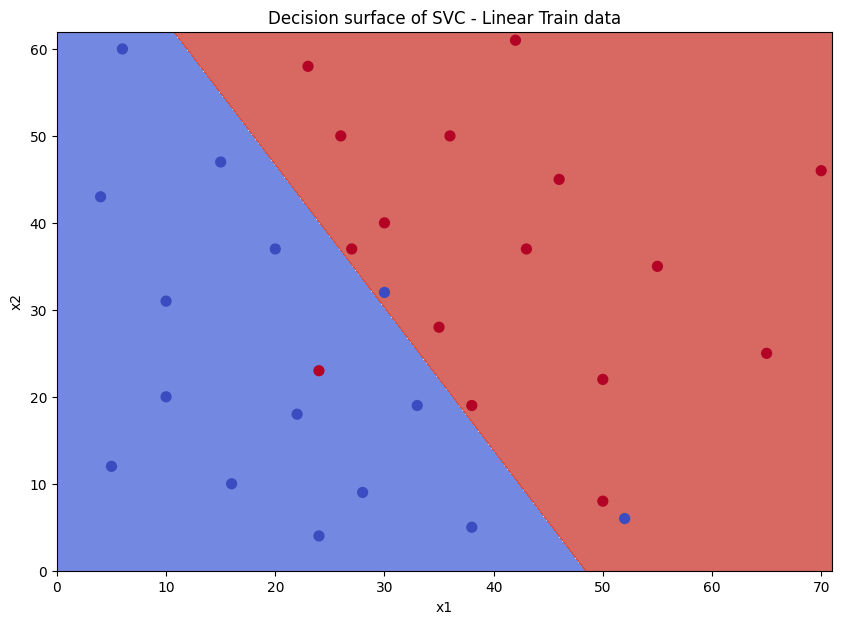

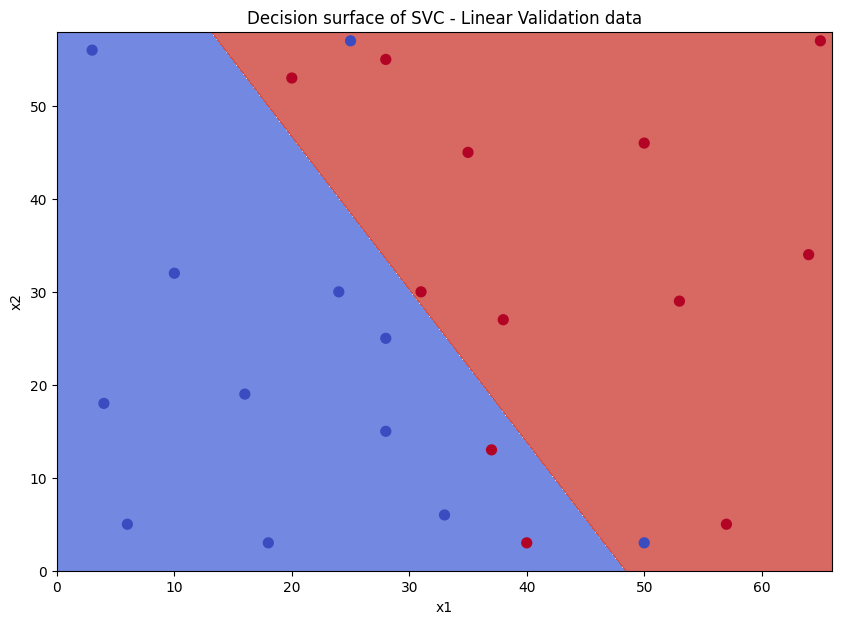

In [ ]:
# Plot the resulting linear model with the training and validation datasets
plot_figure(XTrain, yTrain, clfLinear, '- Linear Train data')
plot_figure(XVal, yVal, clfLinear, '- Linear Validation data')

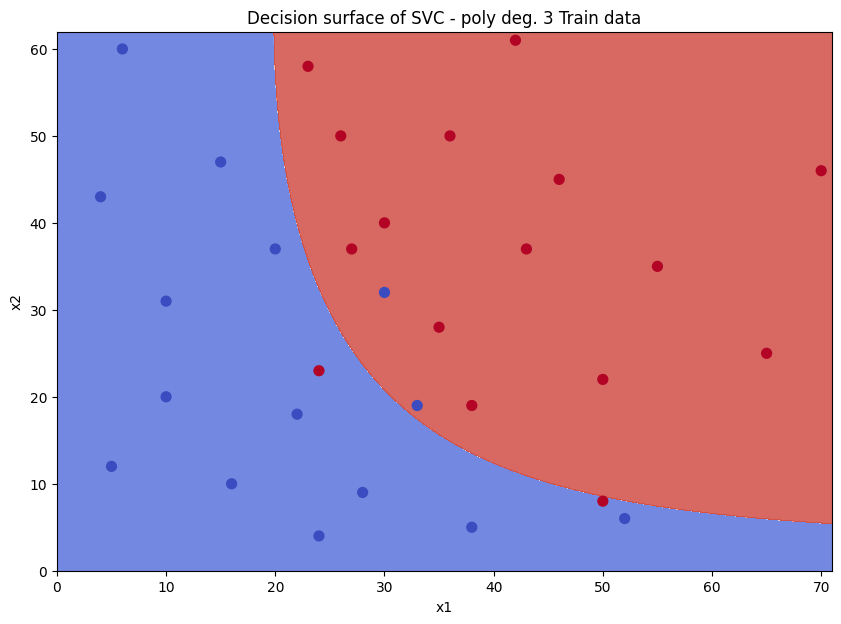

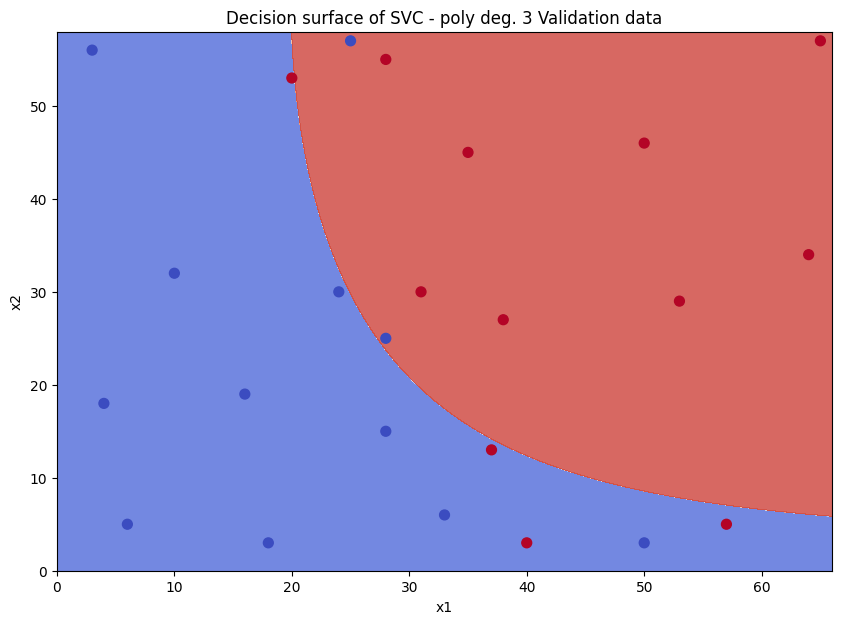

In [ ]:
#Plot the resulting polynomial model of degree 3 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly3, '- poly deg. 3 Train data')
plot_figure(XVal, yVal, clfPoly3, '- poly deg. 3 Validation data')

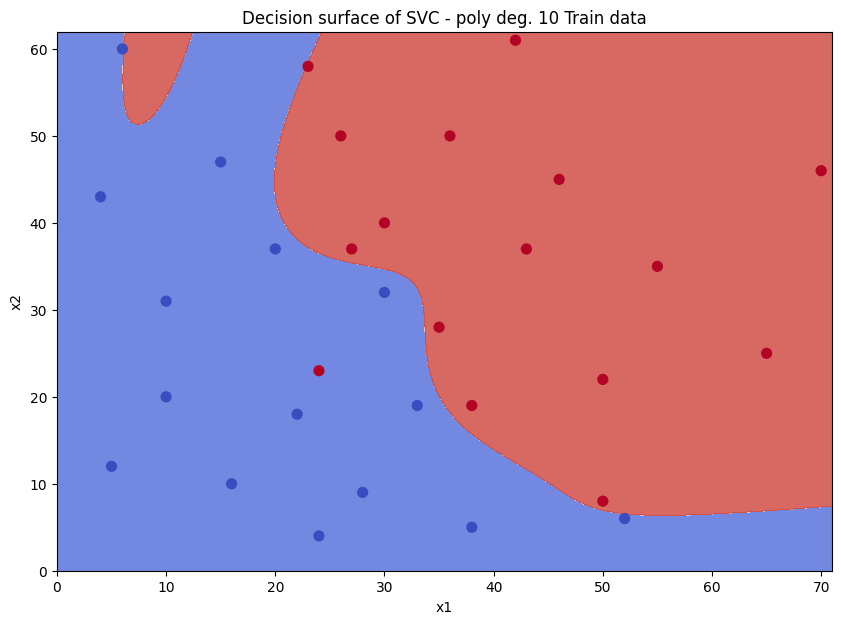

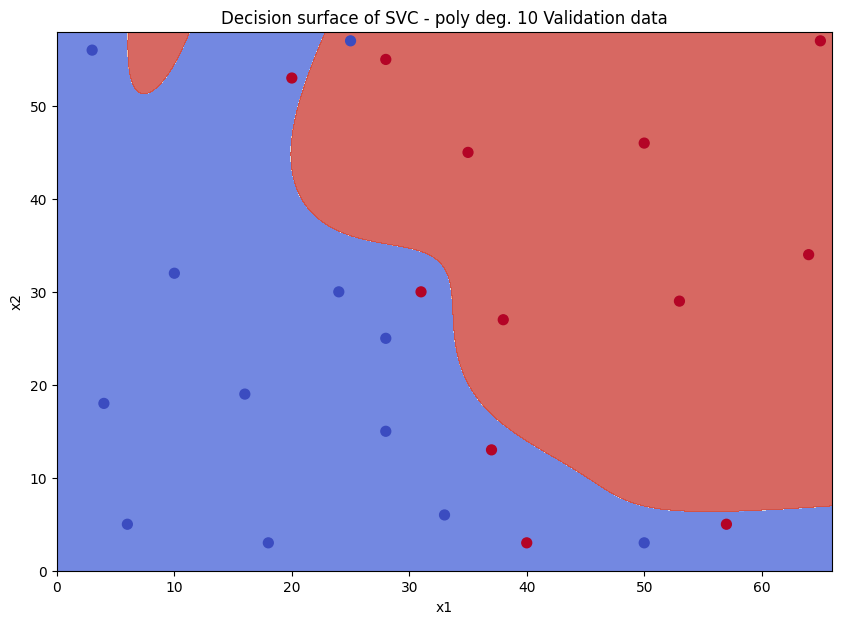

In [ ]:
# #Plot the resulting polynomial model of degree 10 with the training and validation datasets
plot_figure(XTrain, yTrain, clfPoly10, '- poly deg. 10 Train data')
plot_figure(XVal, yVal, clfPoly10, '- poly deg. 10 Validation data')



---



## Regularization parameter C

The SVC function allows us to define the value of the regularization parameter C. Check how to define it, try diferent values $(10^{-5},10^{-2},1,10,10^3...)$ of C on the polynomial functions defined previously and compare the results.

**What is the effect of this parameter on the function?**

$\color{red}{\text{Following results shows the effect of C on the function For degree 3,The model with C= 0.01 looks better showing a balance between training and testing accuracy. A lower value of C (1e-05) shows extreme overfitting and the remaining values show slight overfitting. For degree 10, The model with  C = 1e-05 loos better showing a good balance etween training and testing accuracy. The other values are resulting in overfitting.It is concluded that a moderate value of "C" (C = 0.01 or C = 10) is providing a better balance between fitting the training data and generalizing the testing data. and extreme values of "C" are leading the model to overfit or underfit.}}$

Polynomial degree 3, C = 1e-05
51.61


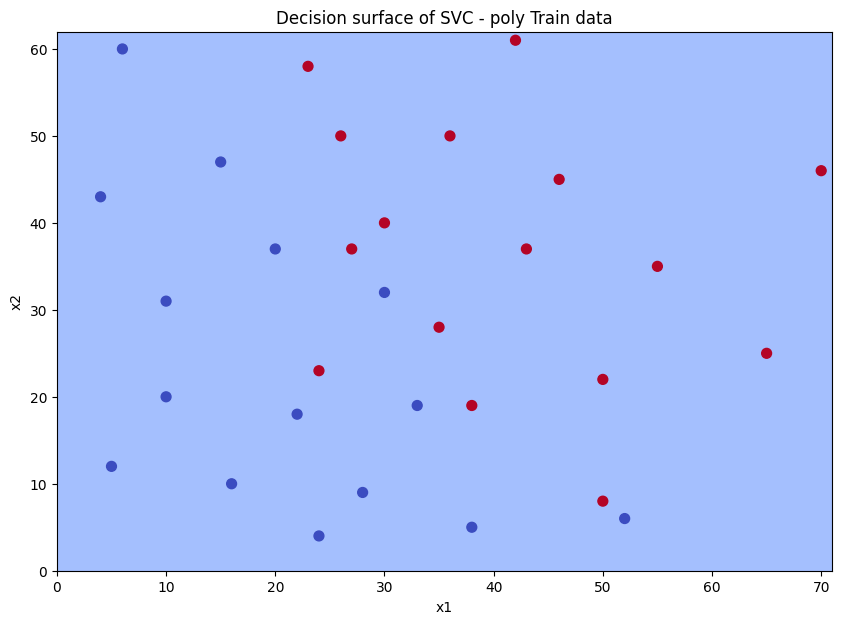

50.0


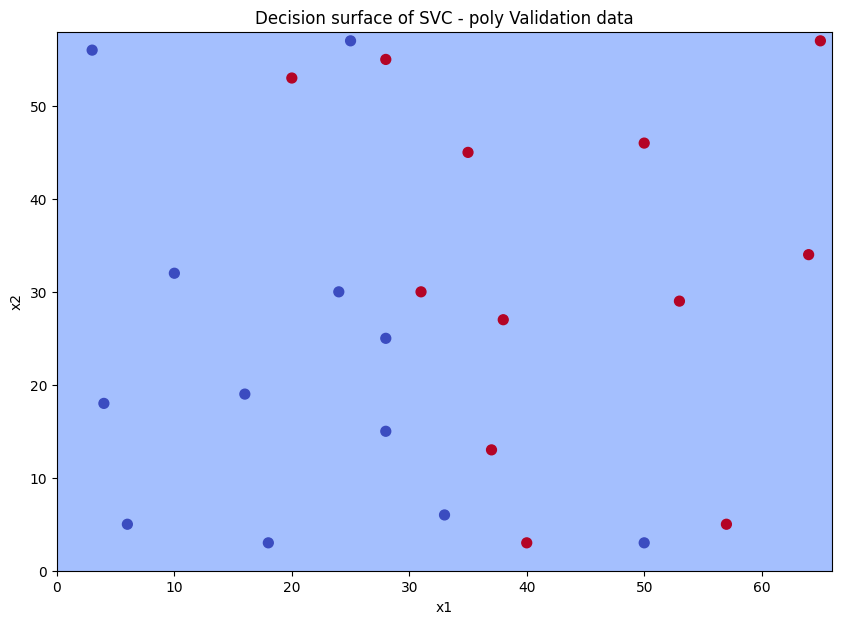

Polynomial degree 3, C = 0.01
87.1


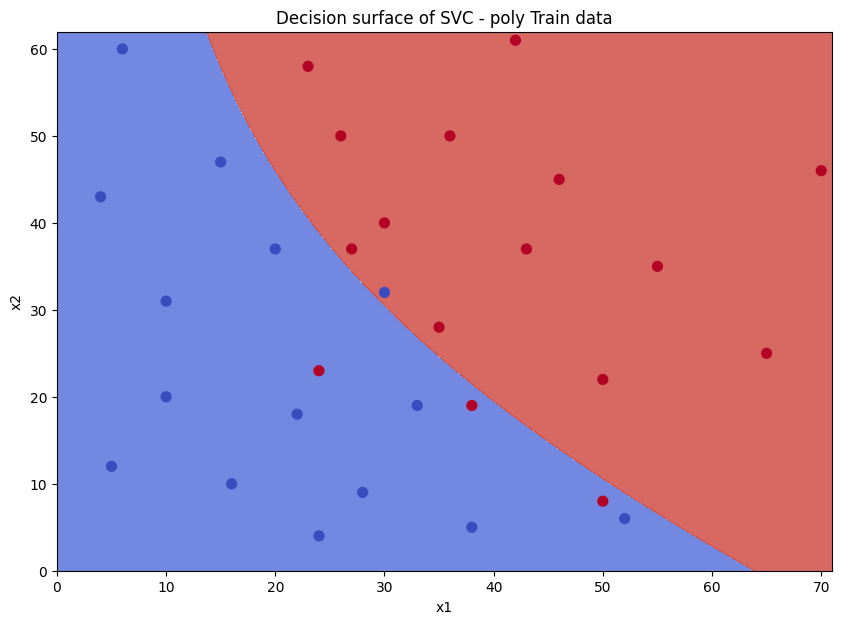

83.33


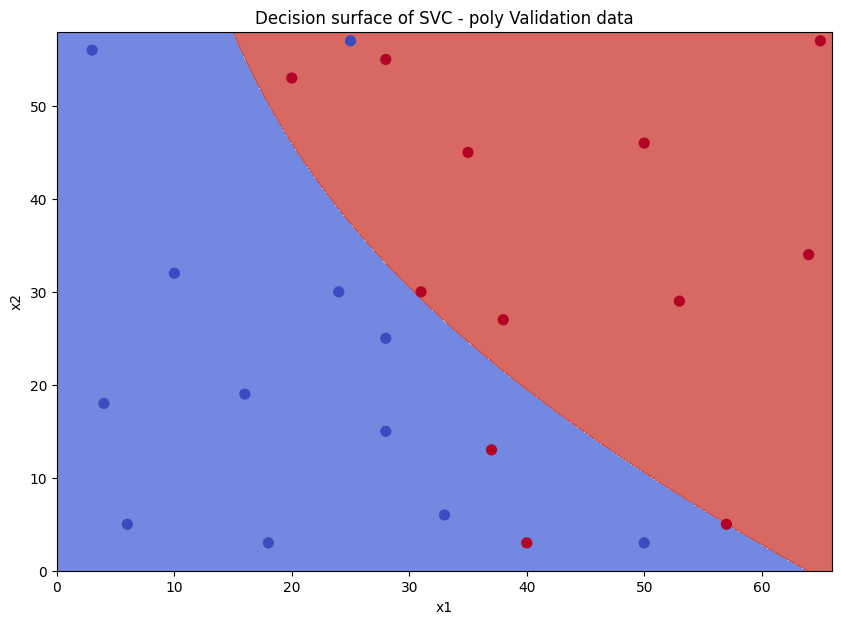

Polynomial degree 3, C = 1
87.1


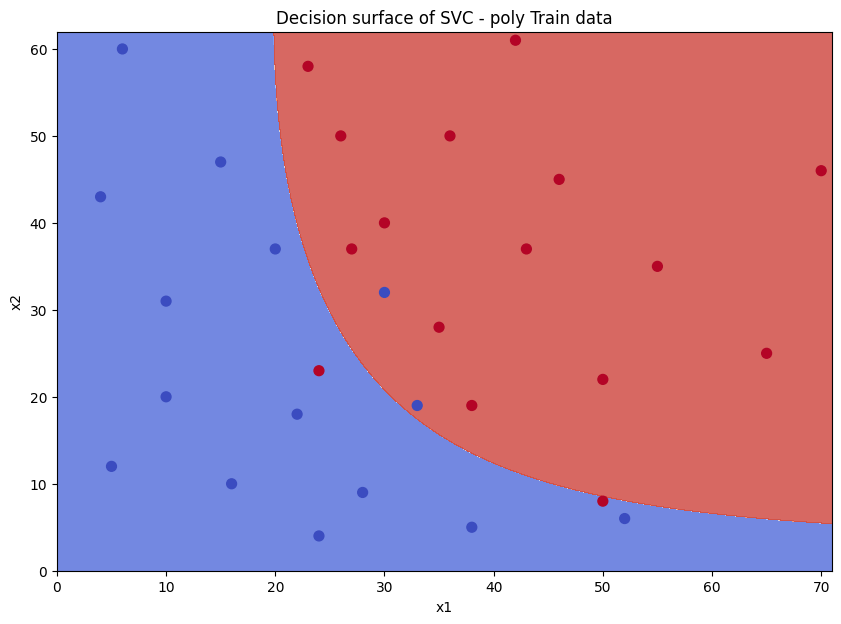

75.0


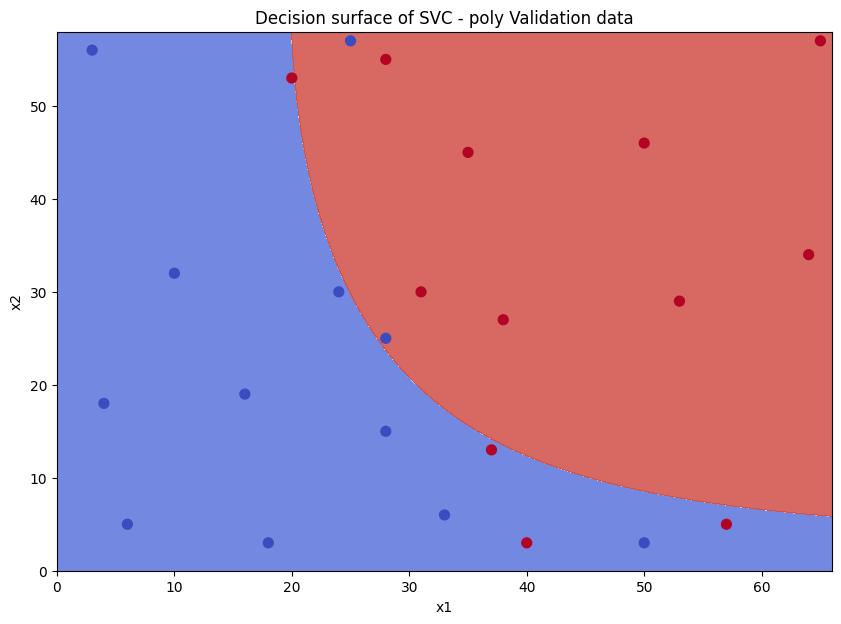

Polynomial degree 3, C = 10
87.1


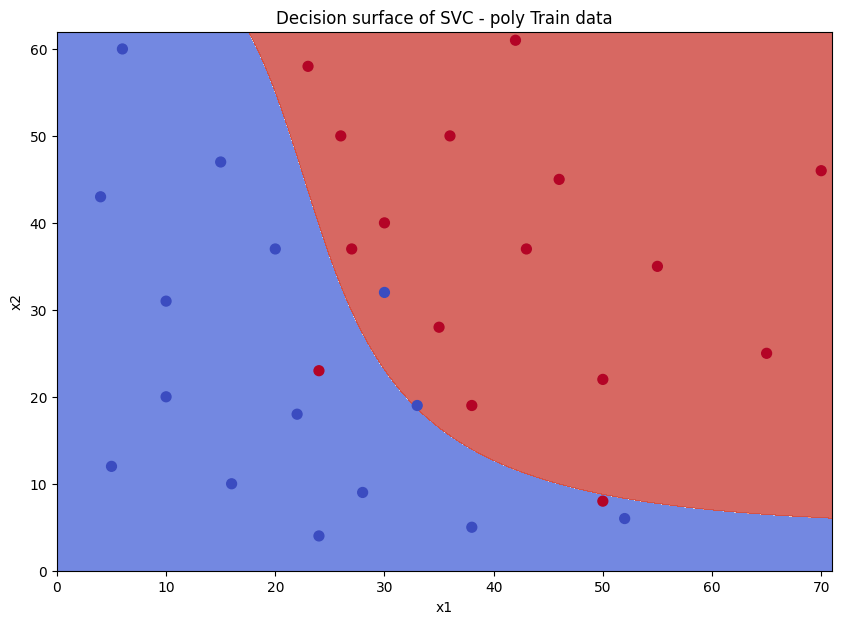

79.17


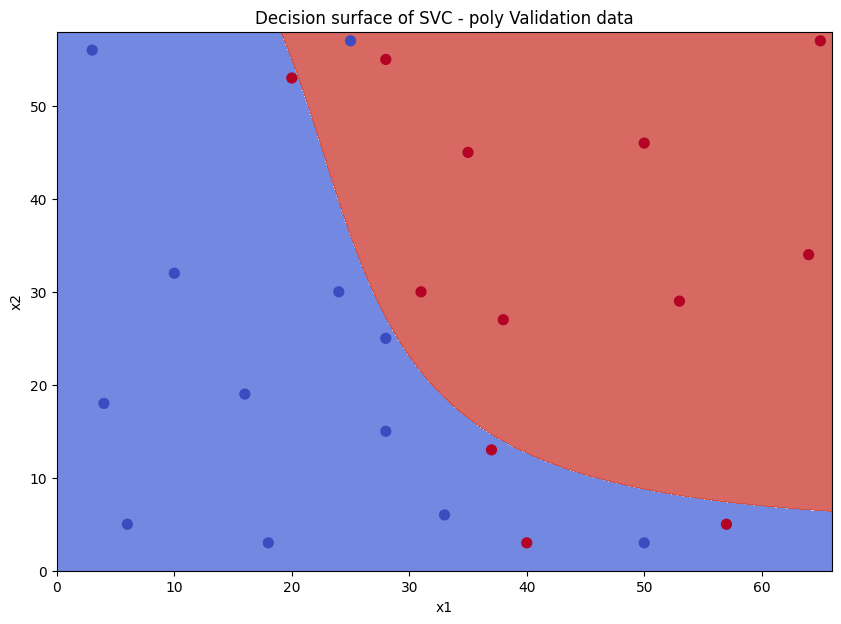

Polynomial degree 3, C = 1000
87.1


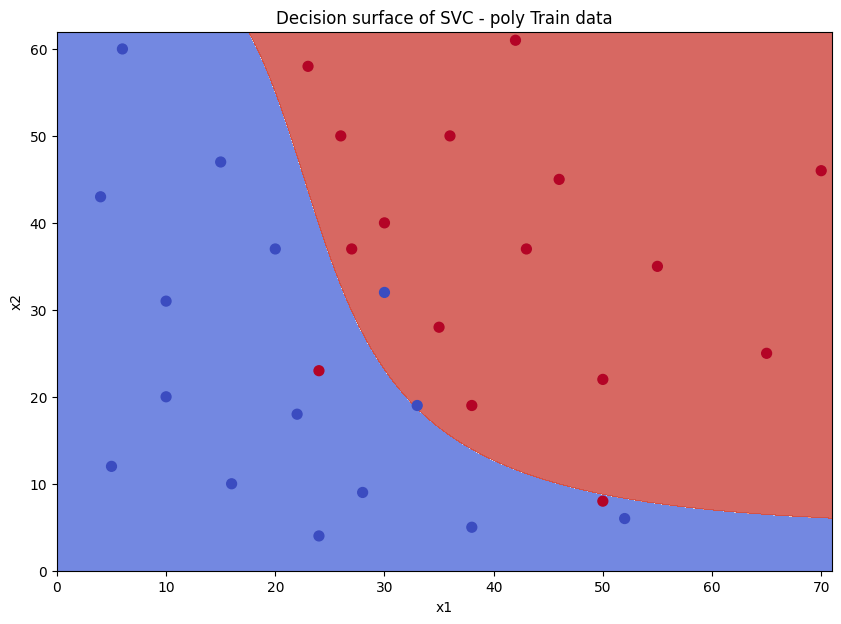

79.17


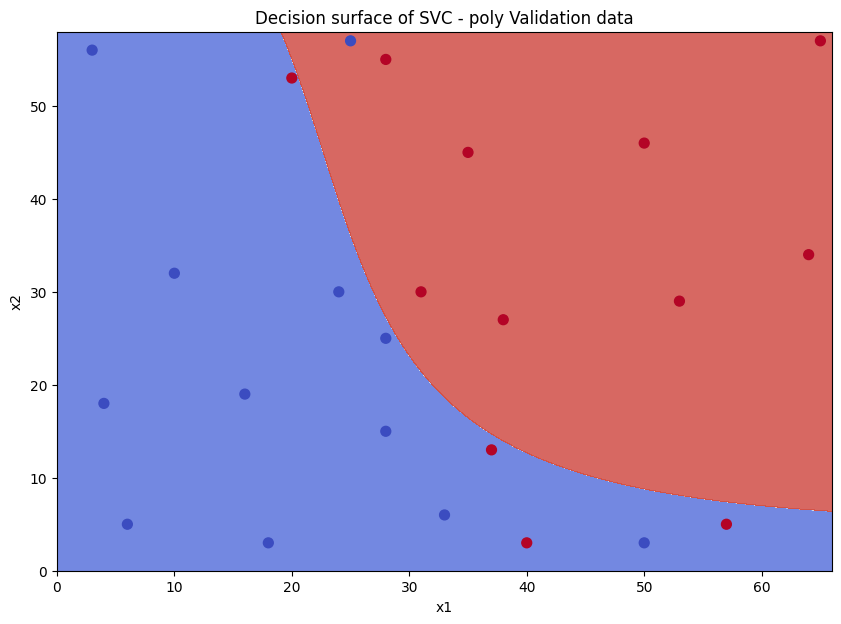

Polynomial degree 10, C = 1e-05
93.55


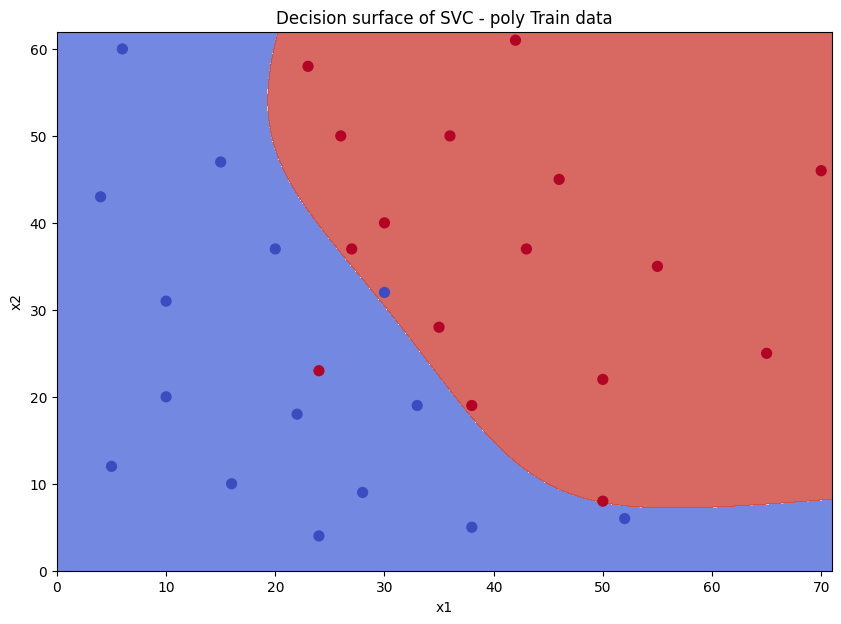

83.33


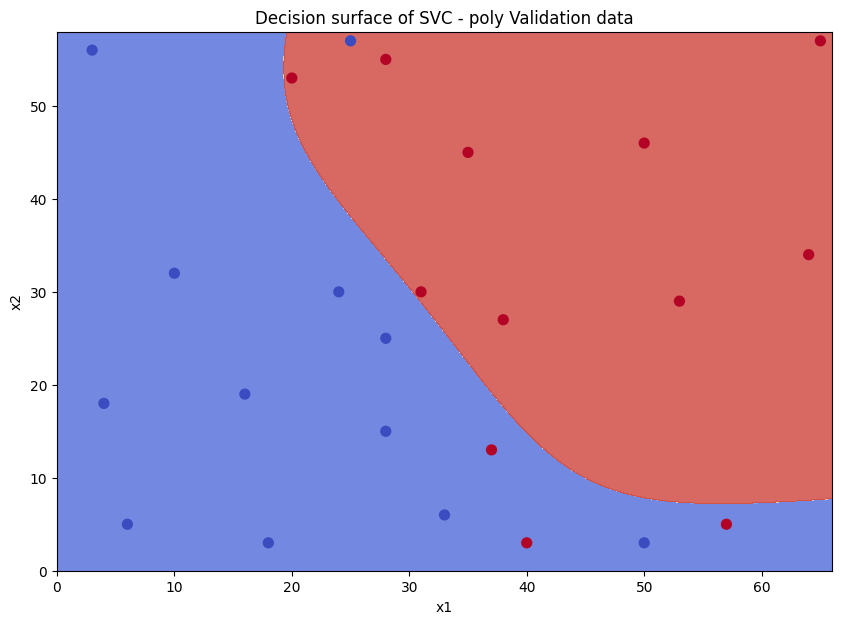

Polynomial degree 10, C = 0.01
96.77


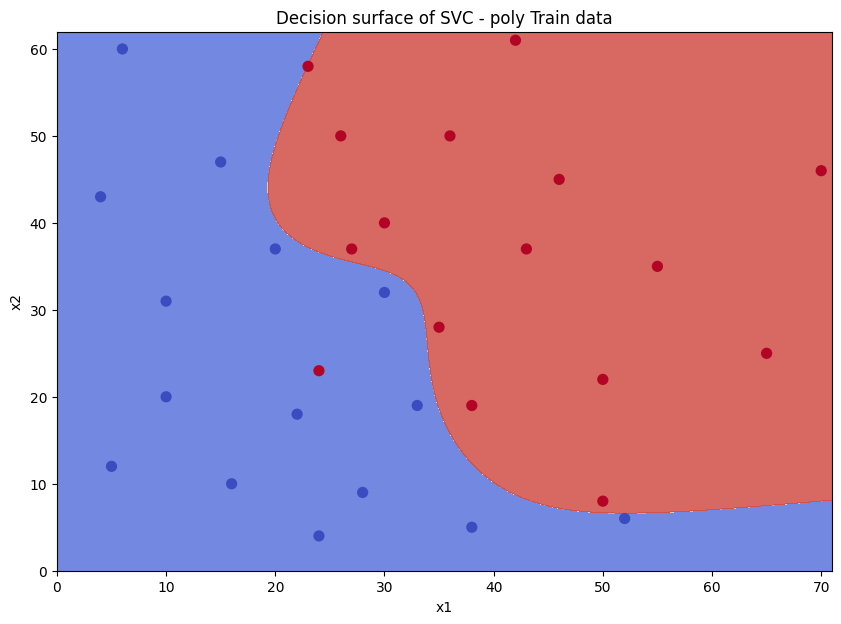

75.0


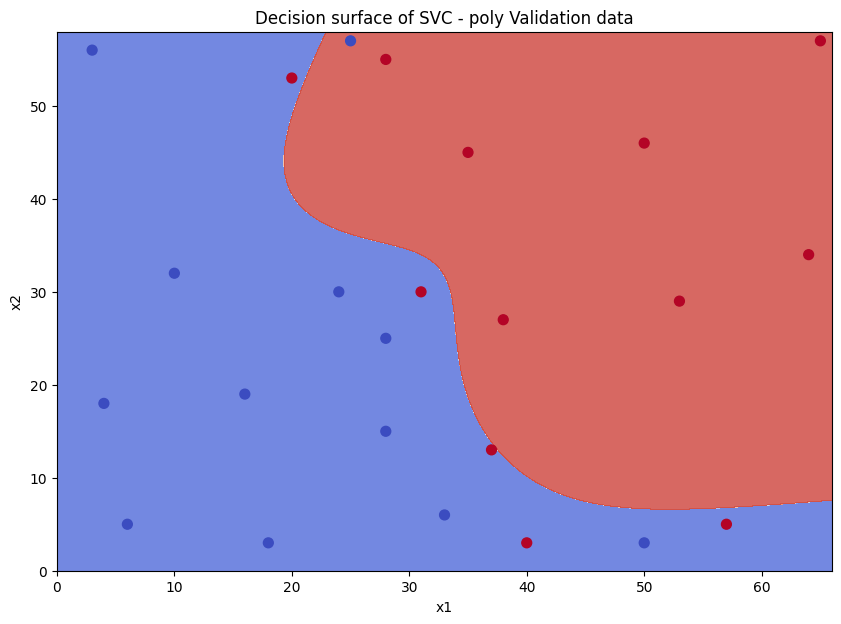

Polynomial degree 10, C = 1
96.77


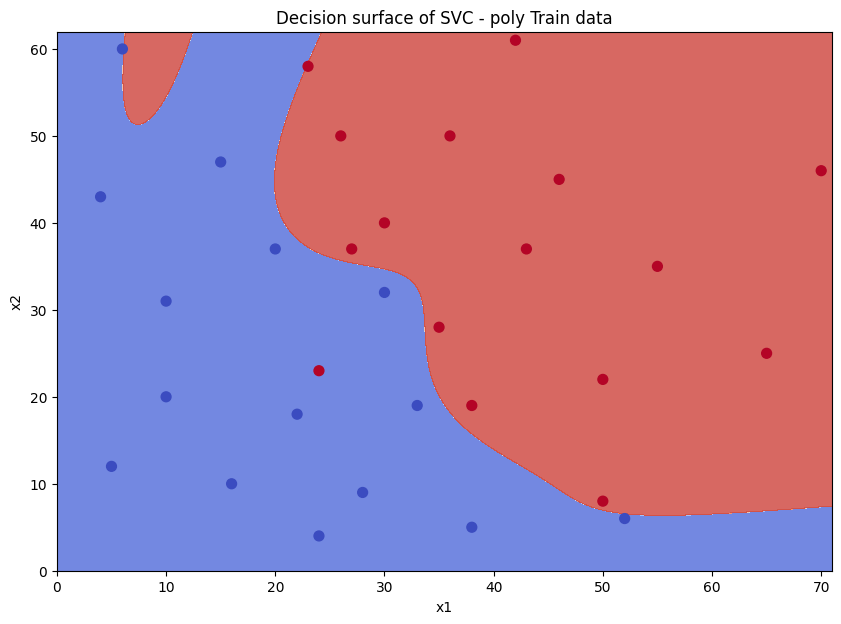

75.0


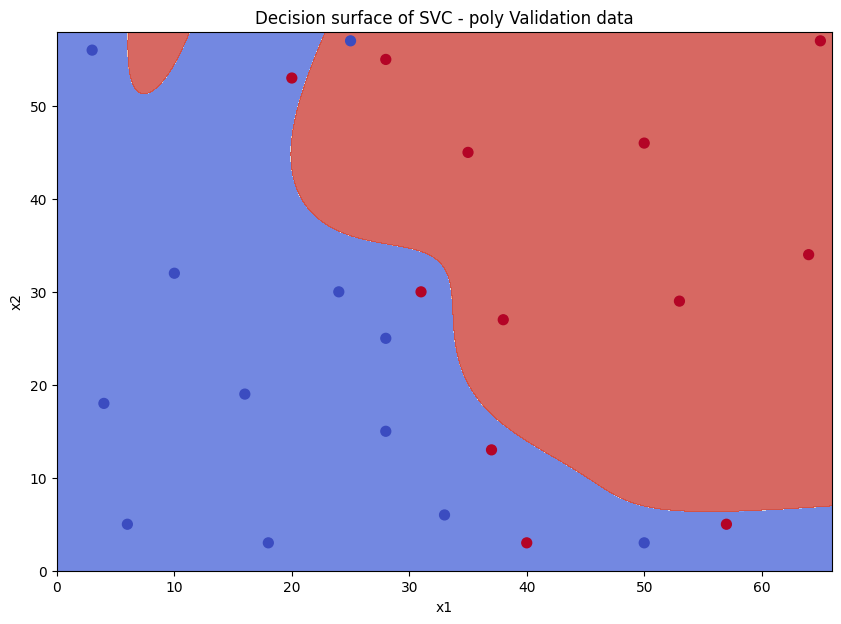

Polynomial degree 10, C = 10
96.77


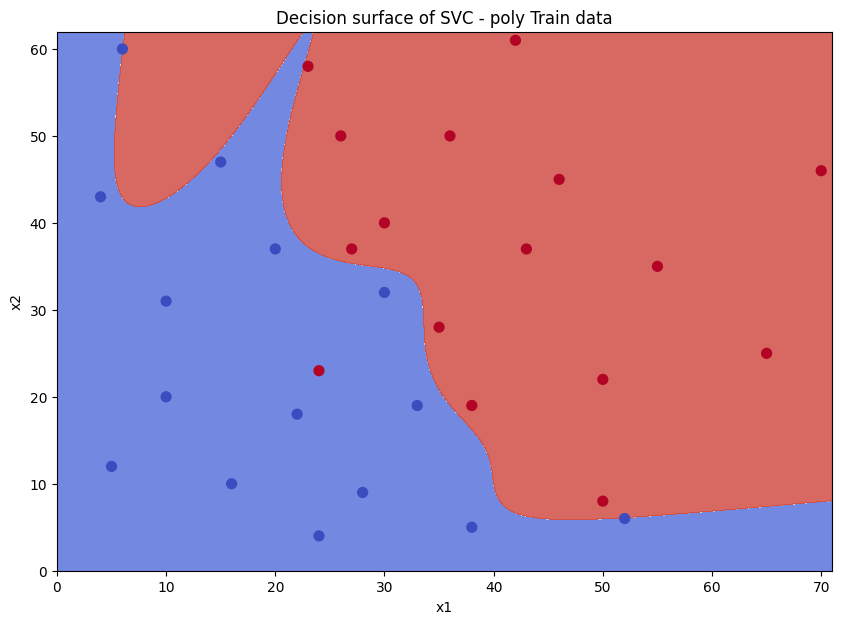

75.0


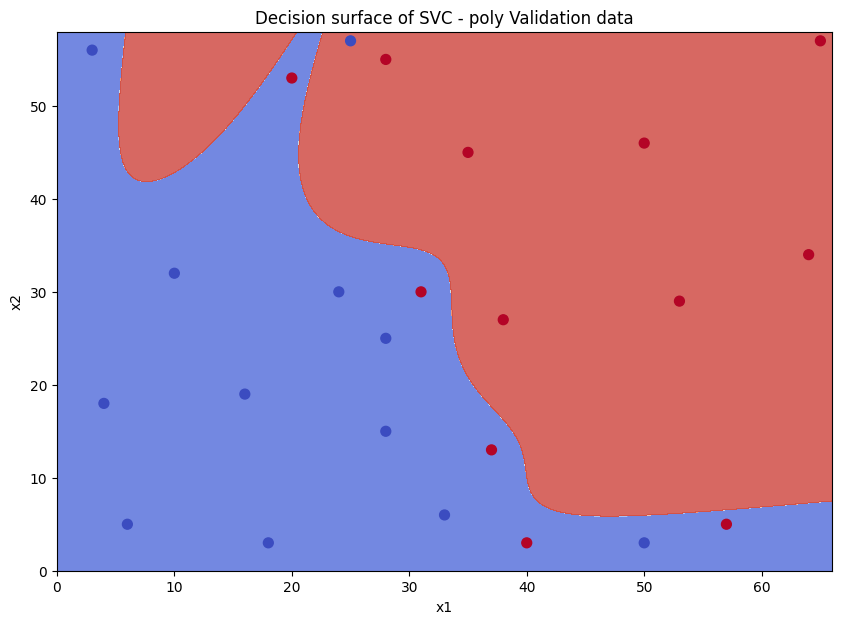

Polynomial degree 10, C = 1000
87.1


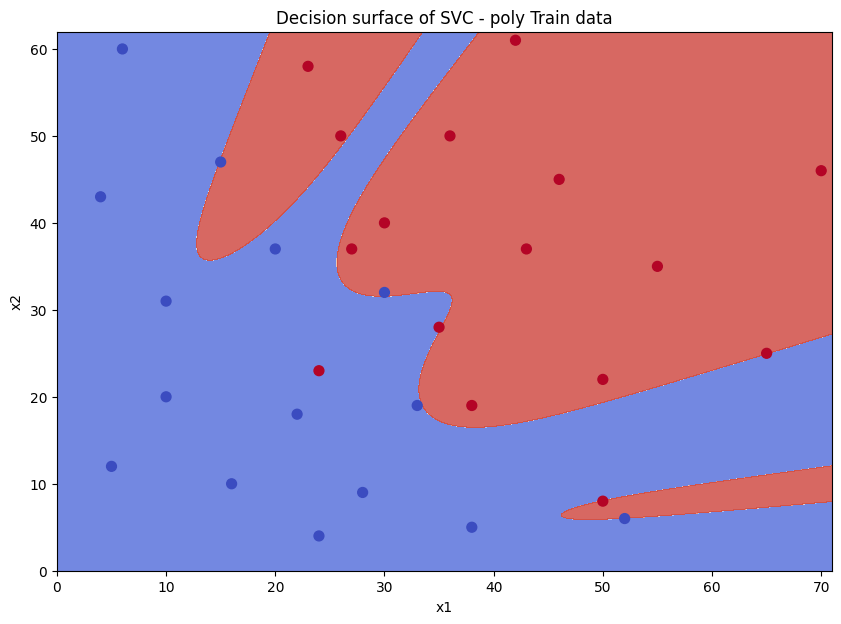

79.17


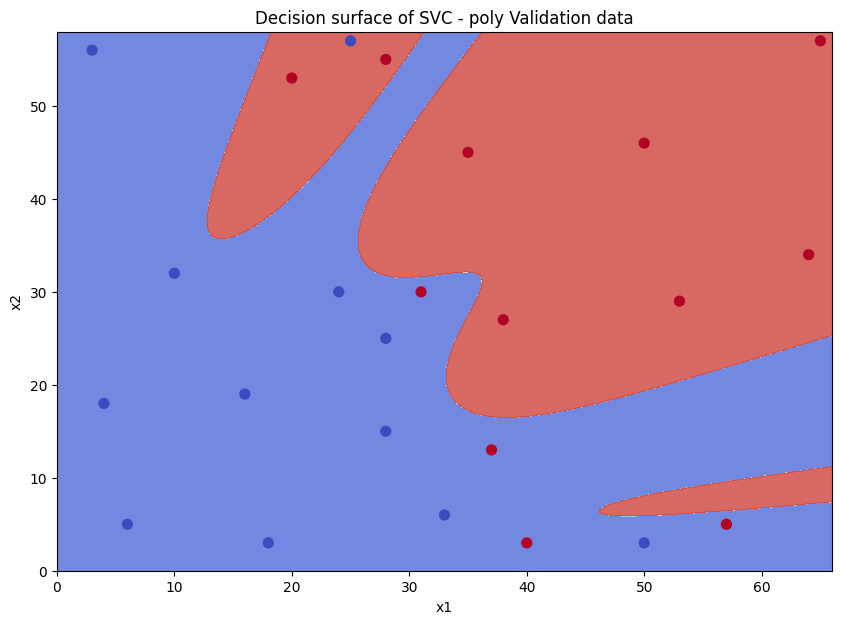

In [ ]:
#TO DO: Define a new SVM model with a polynomial function of degrees 3 and 10, define the C value and calculate % of correct predictions for the training and validation data
# polynomial function
C_value = [1e-5, 1e-2, 1, 10, 1000]
degree = [3,10]

for deg in degree:
  for C in C_value:
    modelPoly = SVC(kernel= 'poly',C = C, degree = deg)
    clfPoly = modelPoly.fit(XTrain, yTrain)
    print(f"Polynomial degree {deg}, C = {C}")

    # TO DO: Check predictions for training data
    res = modelPoly.predict(XTrain)
    print(round(100/len(res)*(res==yTrain).sum(),2))
    plot_figure(XTrain, yTrain, clfPoly, '- poly Train data')

    # TO DO: Check predictions for validation data
    res = modelPoly.predict(XVal)
    print(round(100/len(res)*(res==yVal).sum(),2))
    plot_figure(XVal, yVal, clfPoly, '- poly Validation data')

## The gamma $(\gamma)$ parameter

Another parameter that can be modified is the $\gamma$ parameter. Define a new model with a 'rbf' kernel and try different values of C and $\gamma$ together. **What does 'rbf' stand for?** **How does it work?** **What is the effect of the gamma parameter $(\gamma)$ over the function?**

$\color{red}{\text{RBF stands for radial basis function}}$

$\color{red}{\text{RBF kernel works by transforming data into higher dimensional space, where it measures the similarity between points using gaussian function. The decision boundary in this space seprates the classes,with the gamma controlling the balance between fitting the training data and generalizing to new data.}}$

$\color{red}{\text{By visualizing the results obtained it can be seen that when value of gamma is high (10) the model perfectly fits on the training data showing 100% accuracy but it performs poorly on validation data, resulting in overfitting. when value of gamma is too low (0.01 or 1e-05 the model is simplfying the decision boundary resulting in underfitting. But with a medium value of gamma (0.05) the model is generalizing and hence giving high accuracy for both training and validation data.)}}$

C = 1e-05, gamma = 0.05
% of correct predictions on training data
51.61


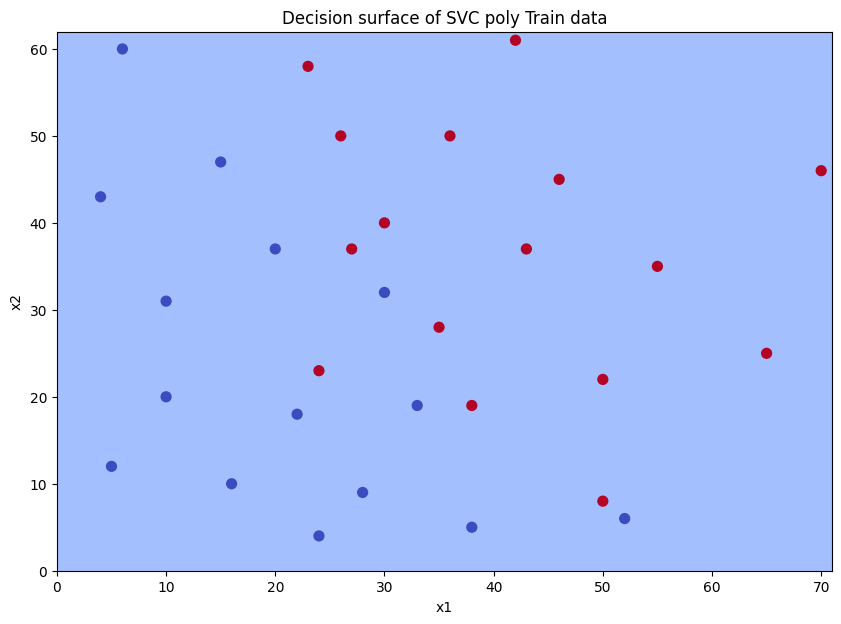

% of correct predictions for validation data
50.0


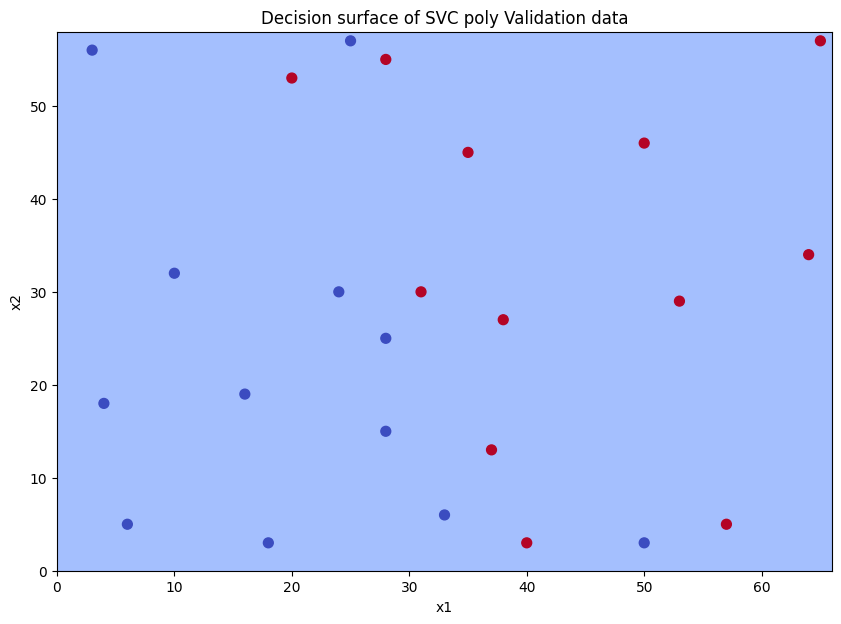

C = 1e-05, gamma = 0.5
% of correct predictions on training data
51.61


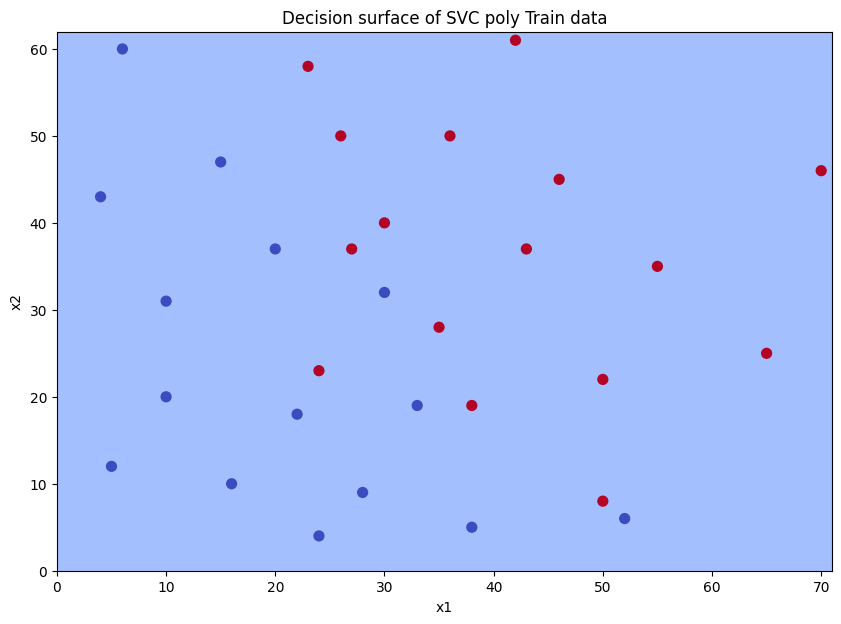

% of correct predictions for validation data
50.0


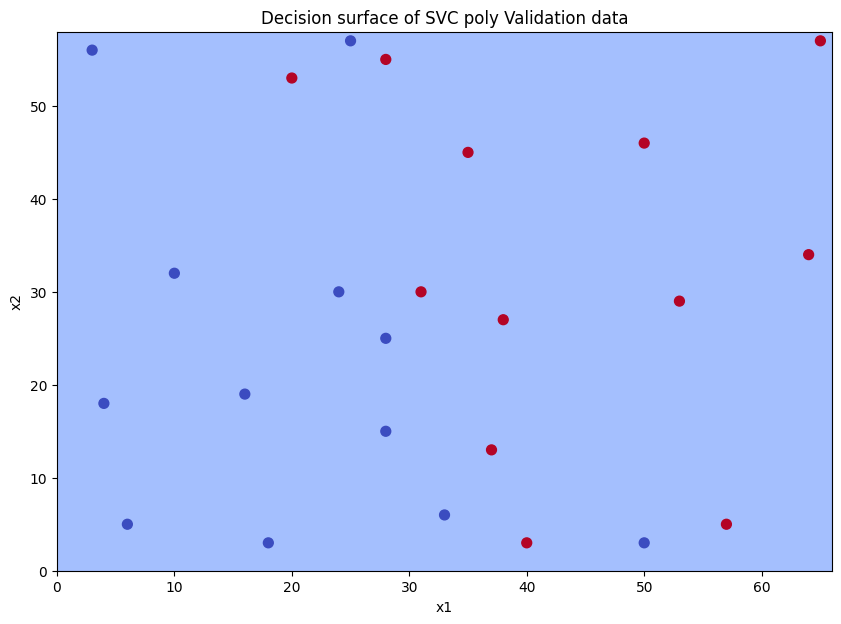

C = 1e-05, gamma = 2
% of correct predictions on training data
51.61


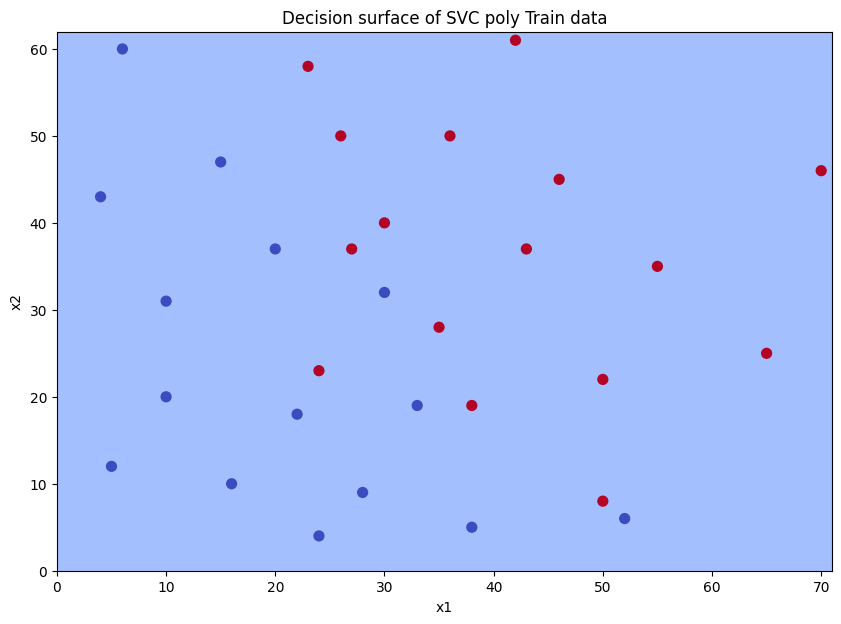

% of correct predictions for validation data
50.0


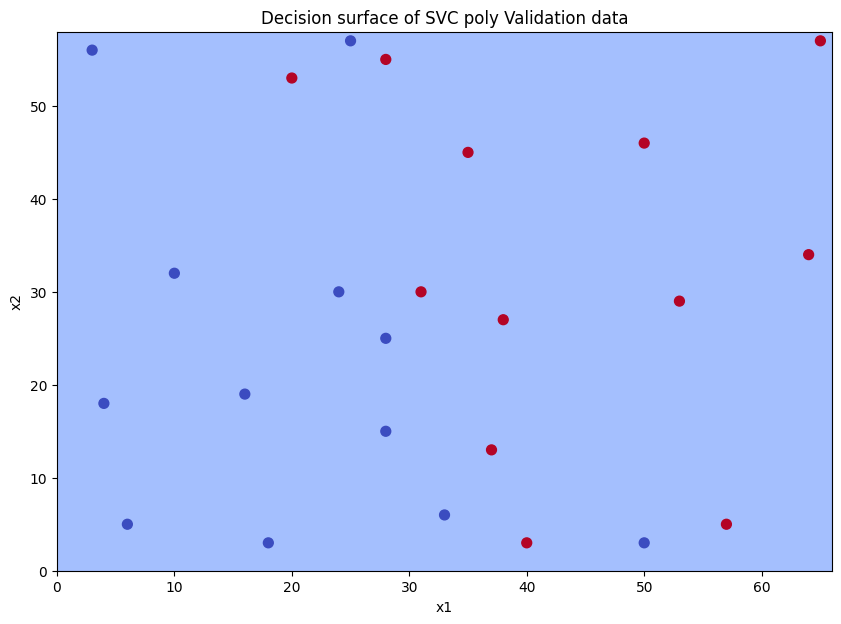

C = 1e-05, gamma = 5
% of correct predictions on training data
51.61


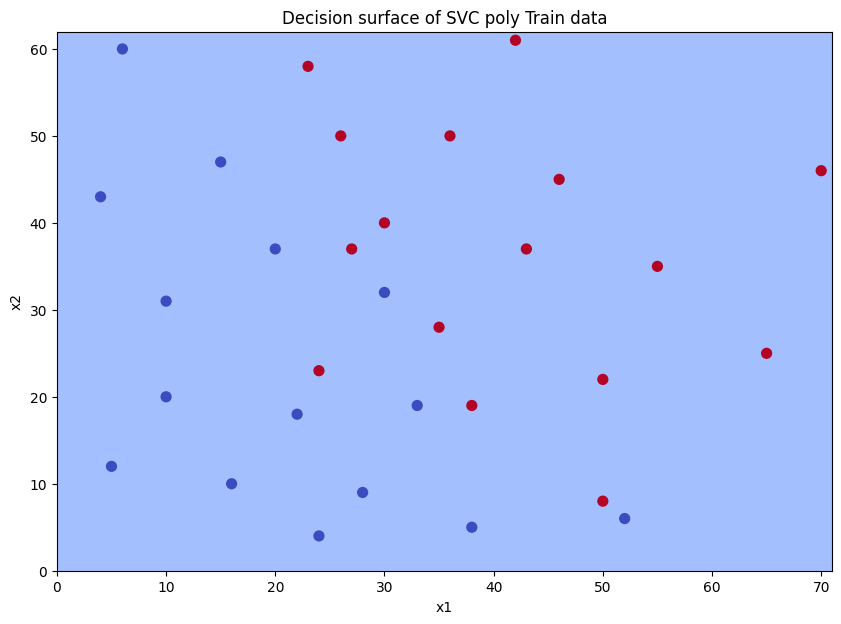

% of correct predictions for validation data
50.0


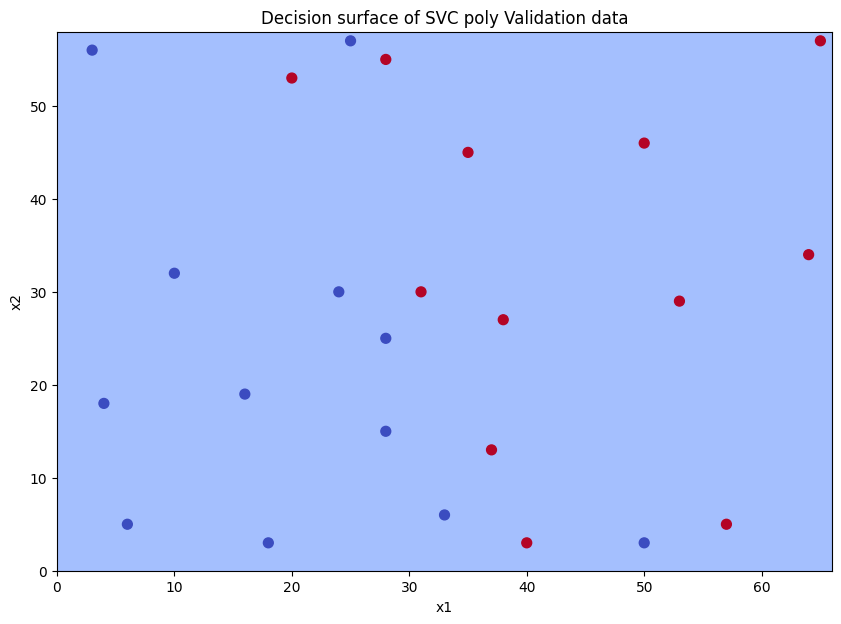

C = 1e-05, gamma = 10
% of correct predictions on training data
51.61


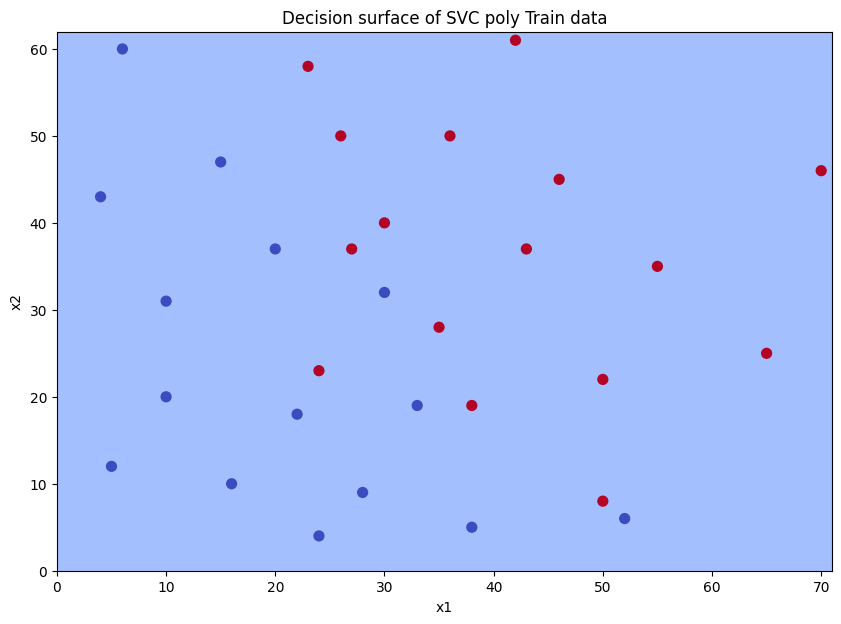

% of correct predictions for validation data
50.0


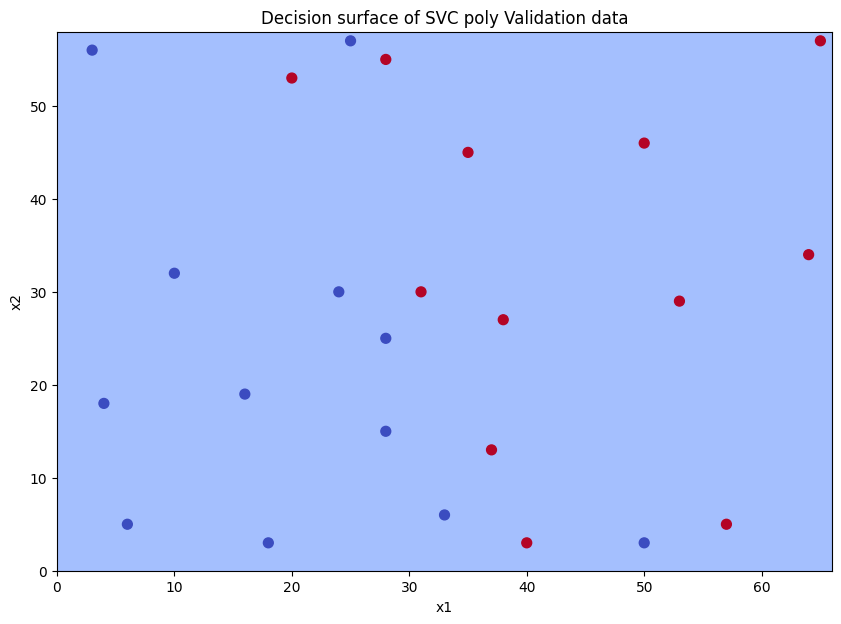

C = 0.01, gamma = 0.05
% of correct predictions on training data
51.61


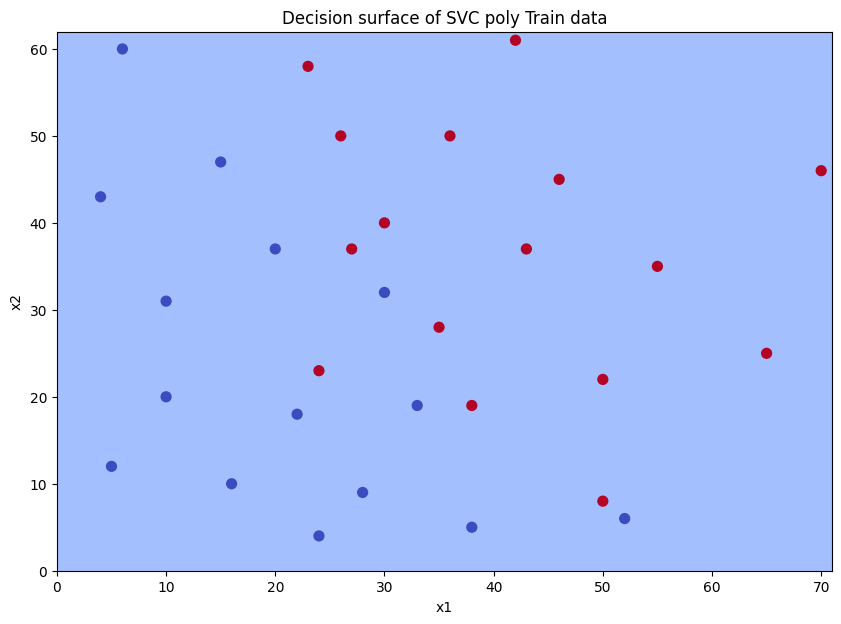

% of correct predictions for validation data
50.0


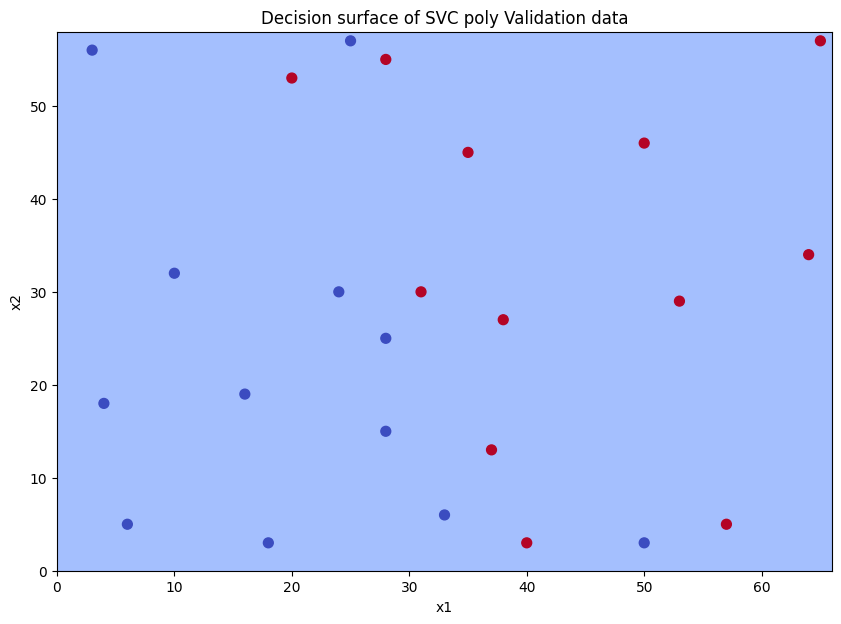

C = 0.01, gamma = 0.5
% of correct predictions on training data
51.61


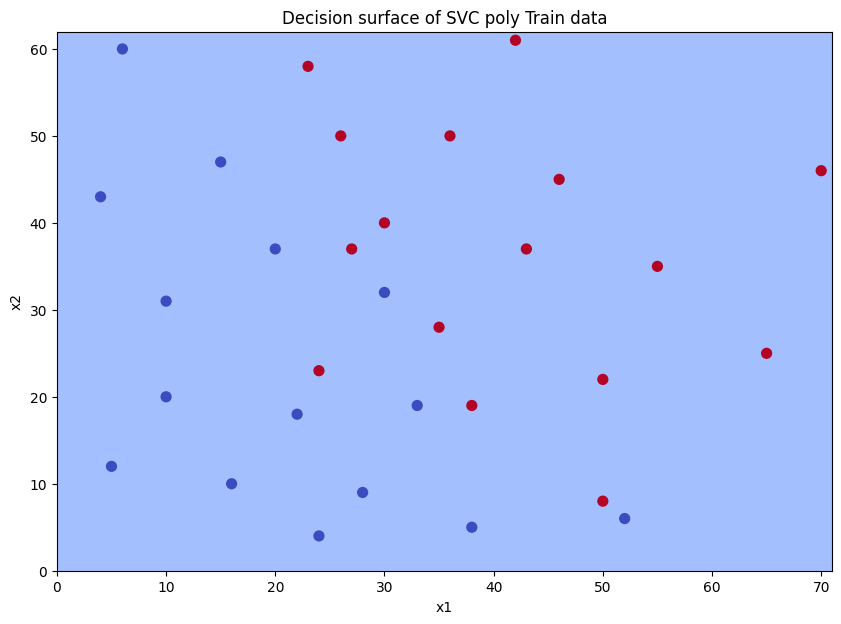

% of correct predictions for validation data
50.0


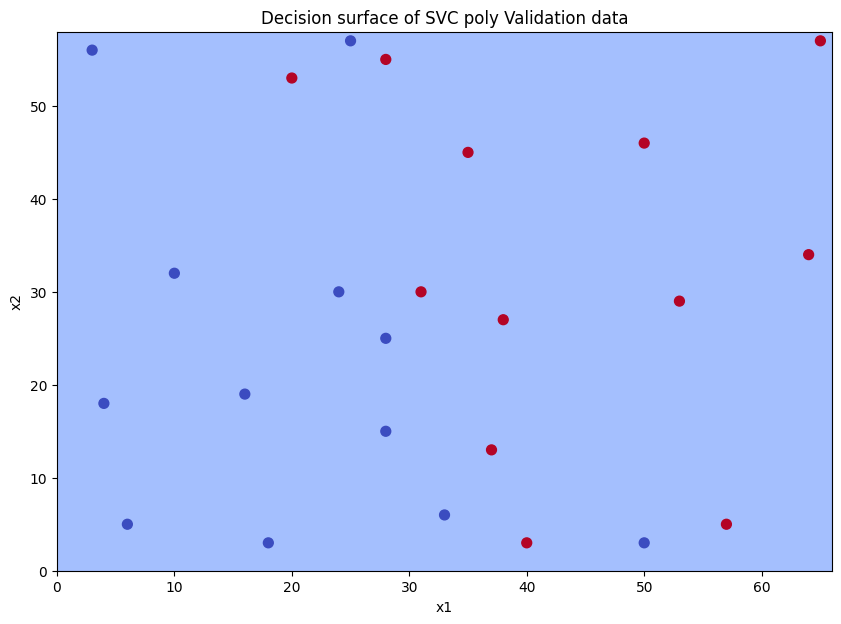

C = 0.01, gamma = 2
% of correct predictions on training data
51.61


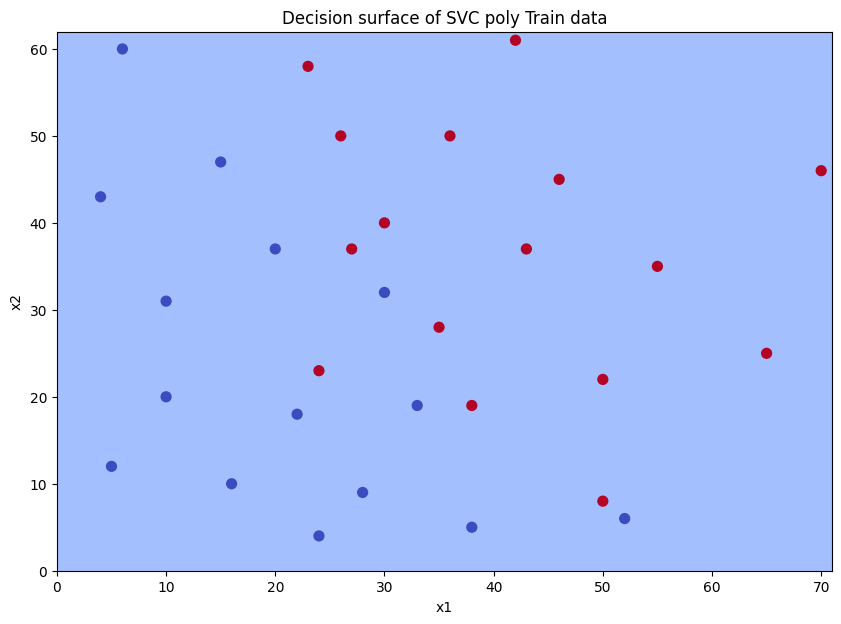

% of correct predictions for validation data
50.0


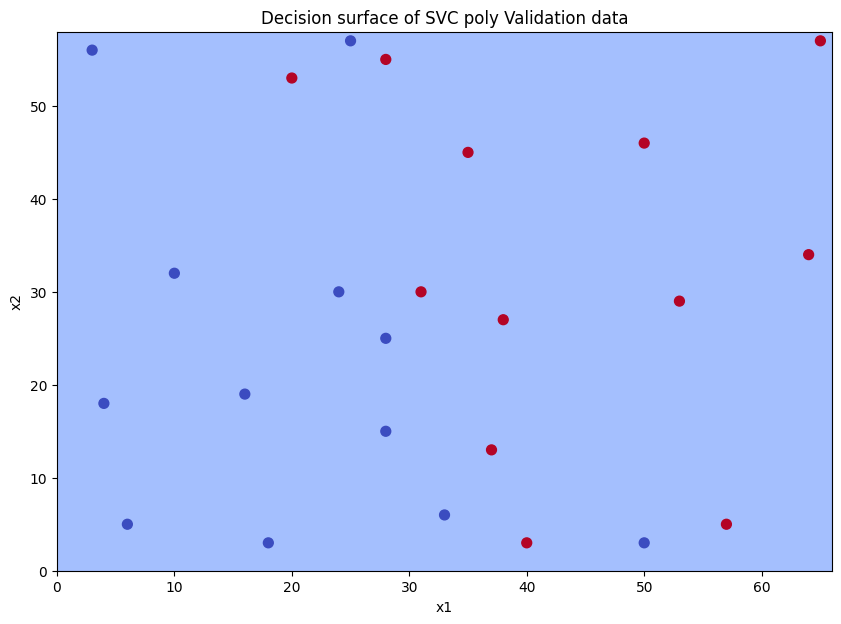

C = 0.01, gamma = 5
% of correct predictions on training data
51.61


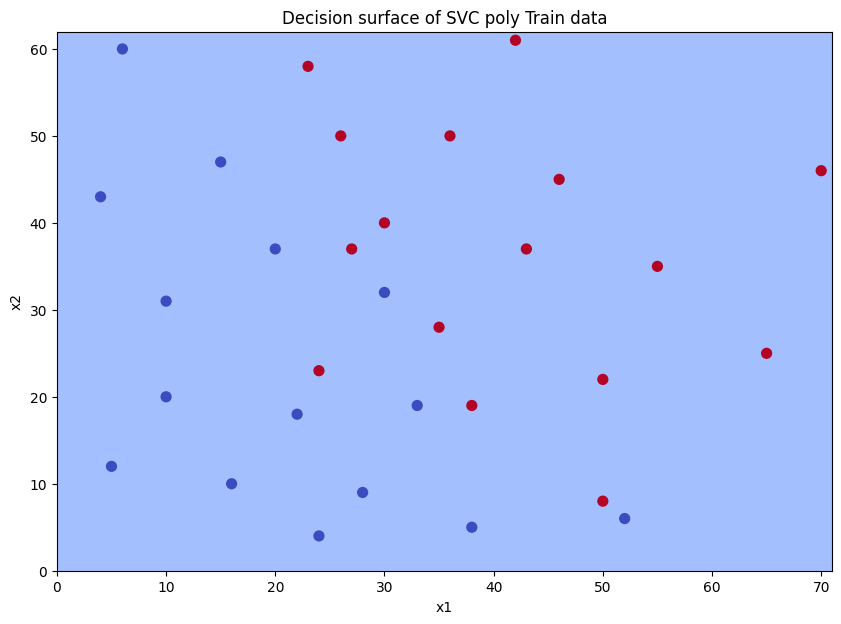

% of correct predictions for validation data
50.0


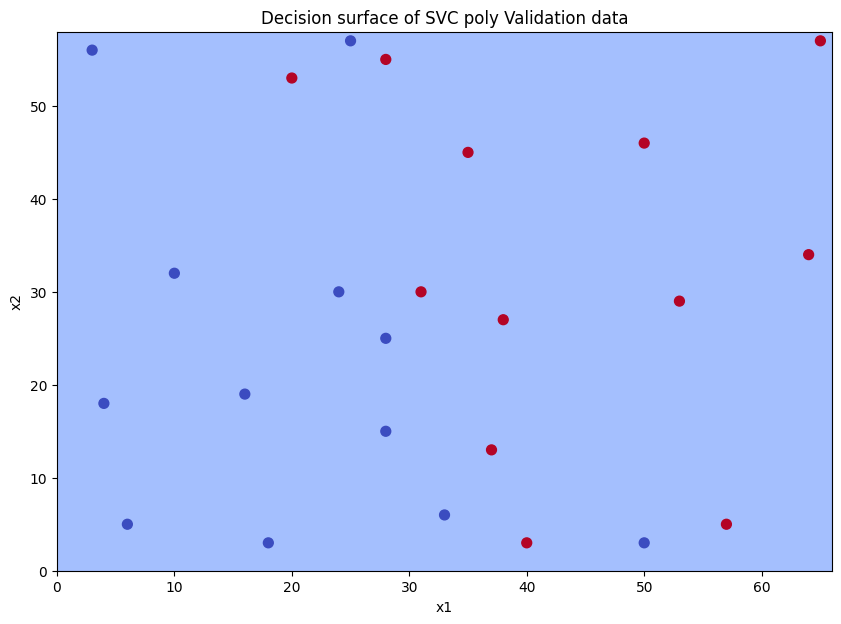

C = 0.01, gamma = 10
% of correct predictions on training data
51.61


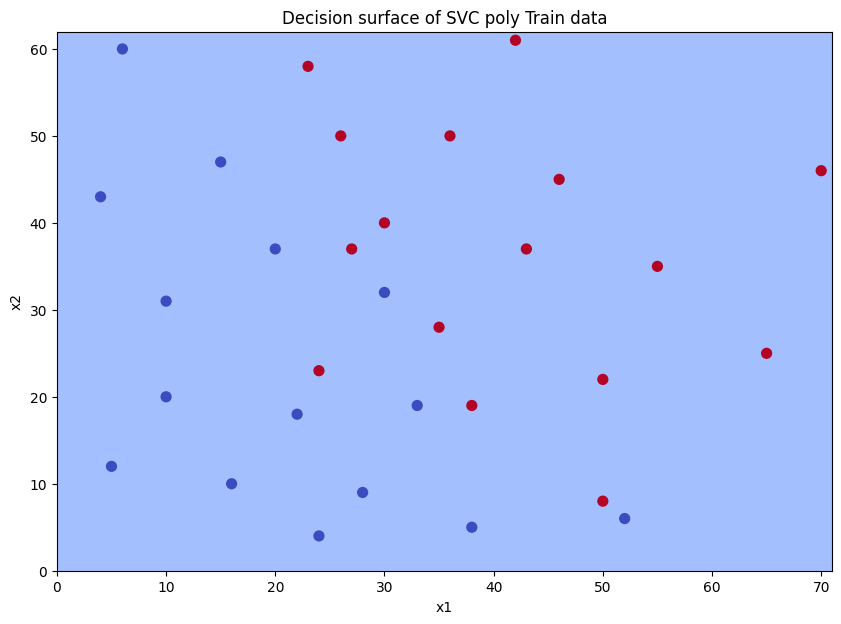

% of correct predictions for validation data
50.0


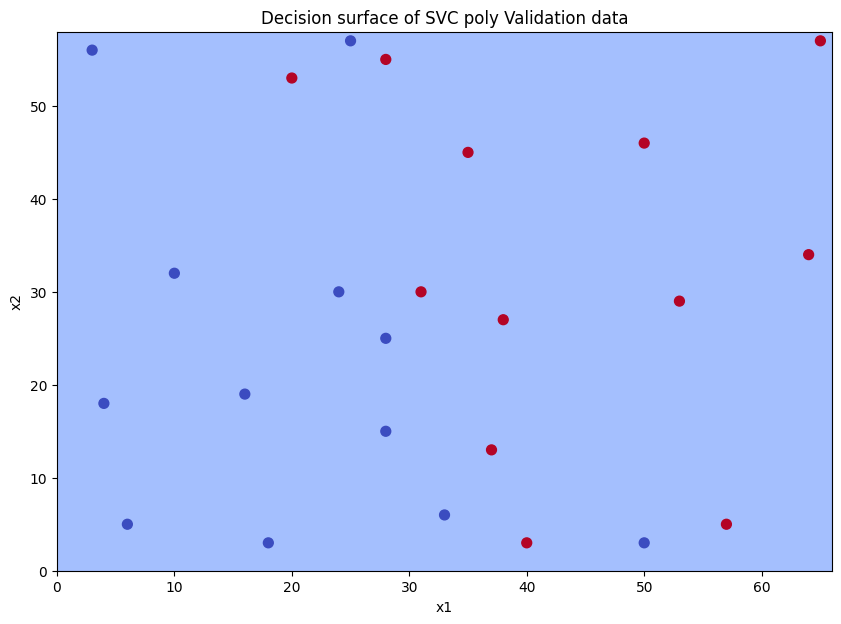

C = 1, gamma = 0.05
% of correct predictions on training data
100.0


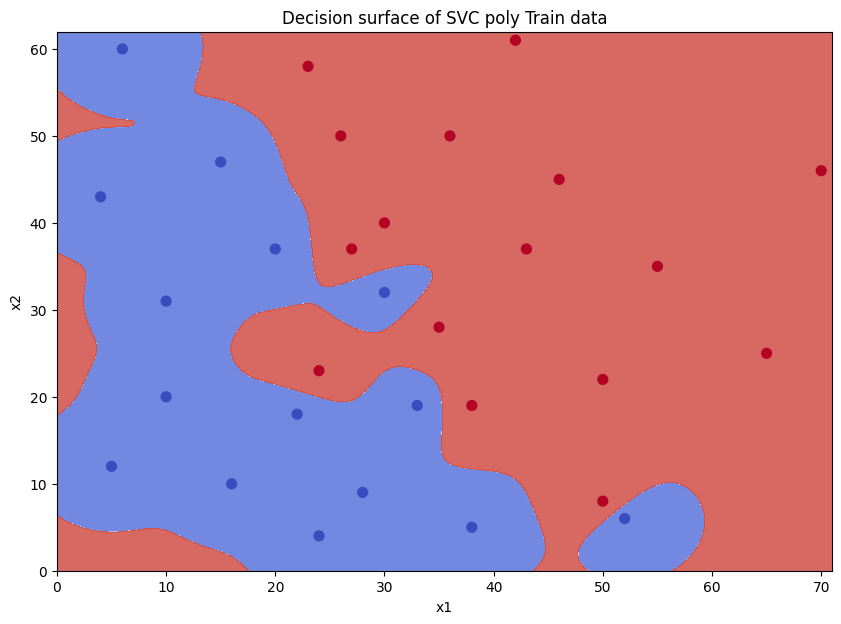

% of correct predictions for validation data
75.0


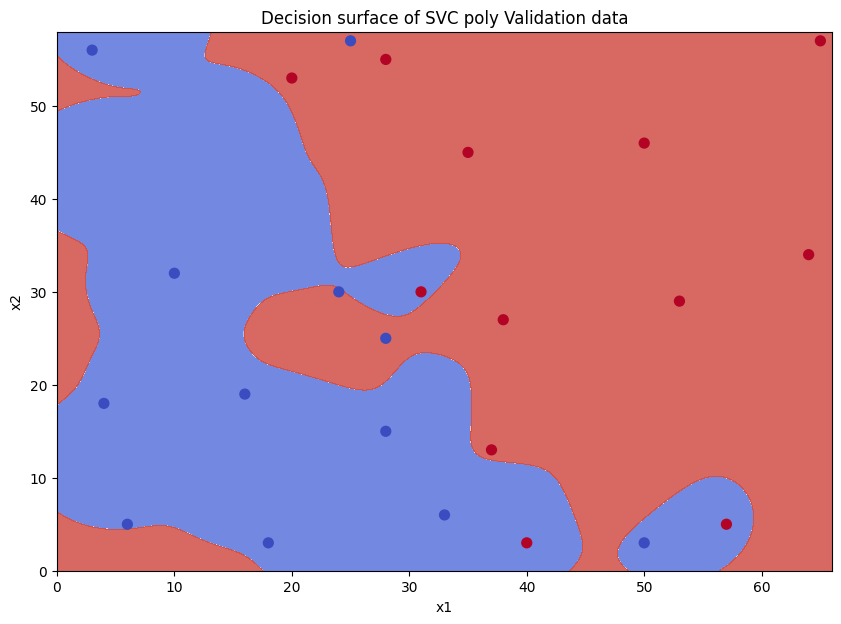

C = 1, gamma = 0.5
% of correct predictions on training data
100.0


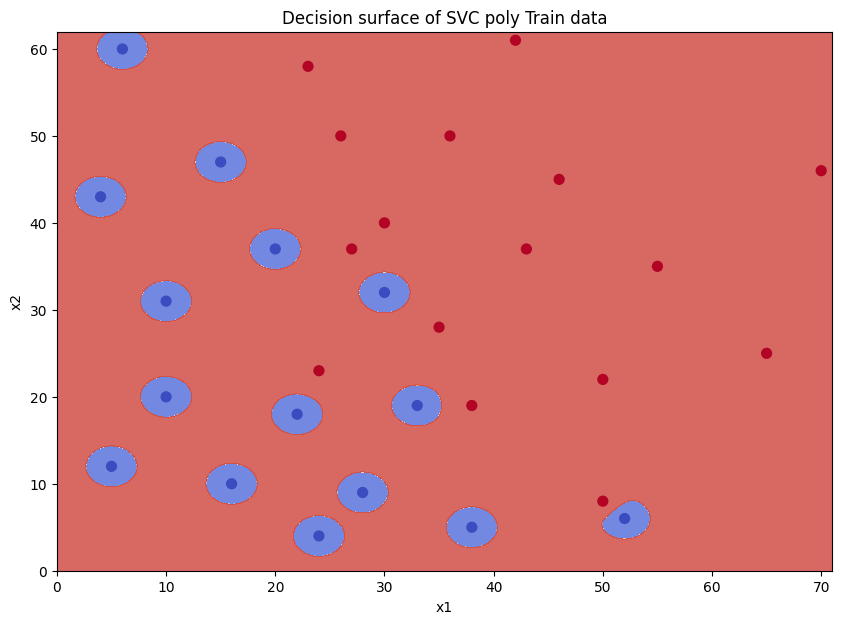

% of correct predictions for validation data
50.0


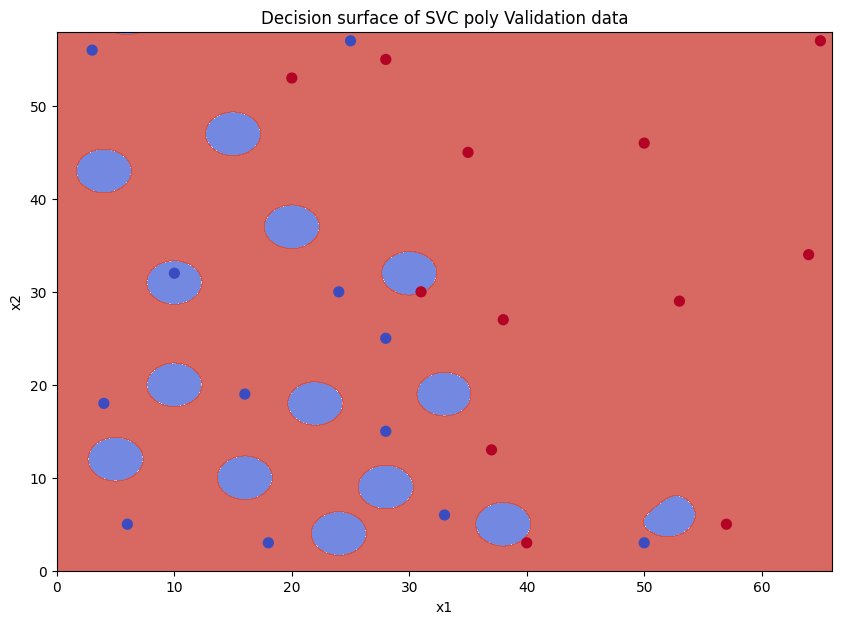

C = 1, gamma = 2
% of correct predictions on training data
100.0


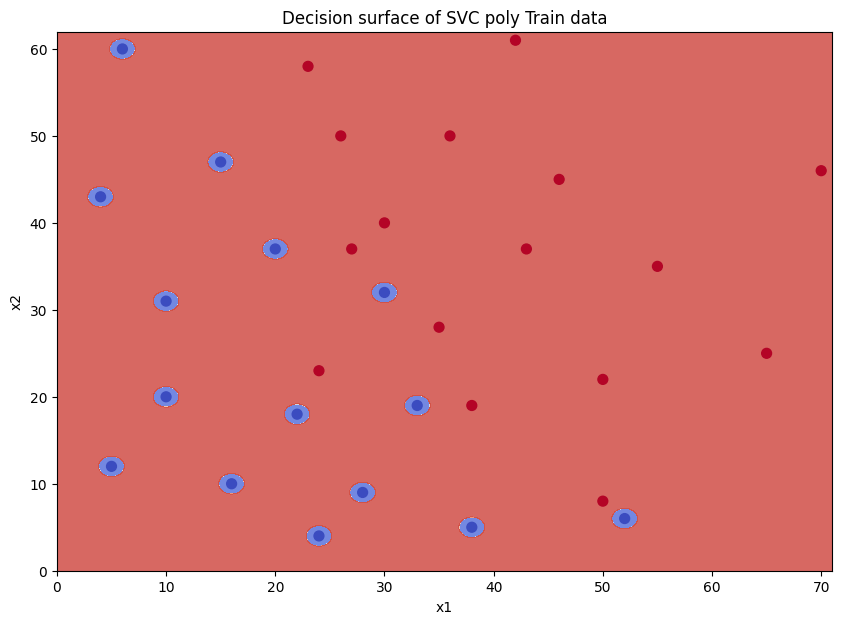

% of correct predictions for validation data
54.17


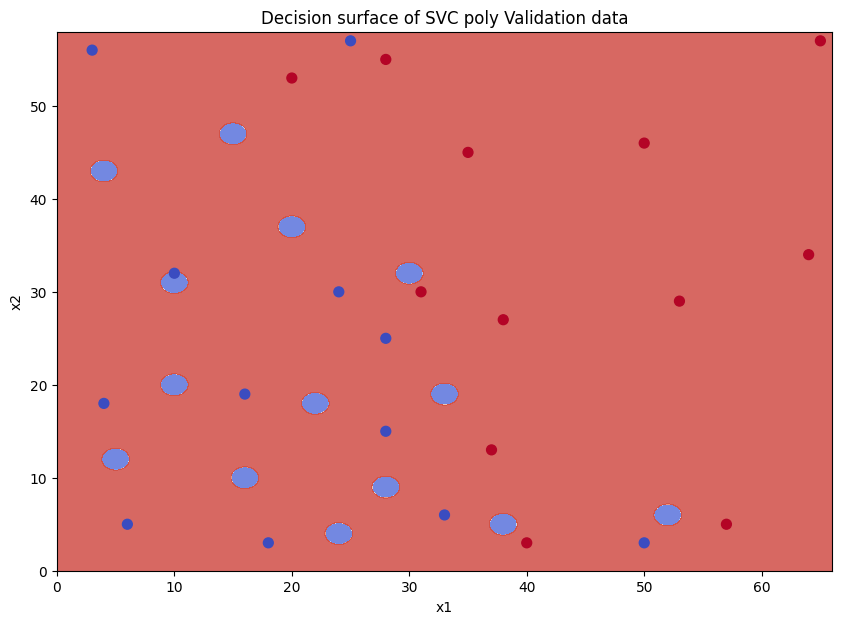

C = 1, gamma = 5
% of correct predictions on training data
100.0


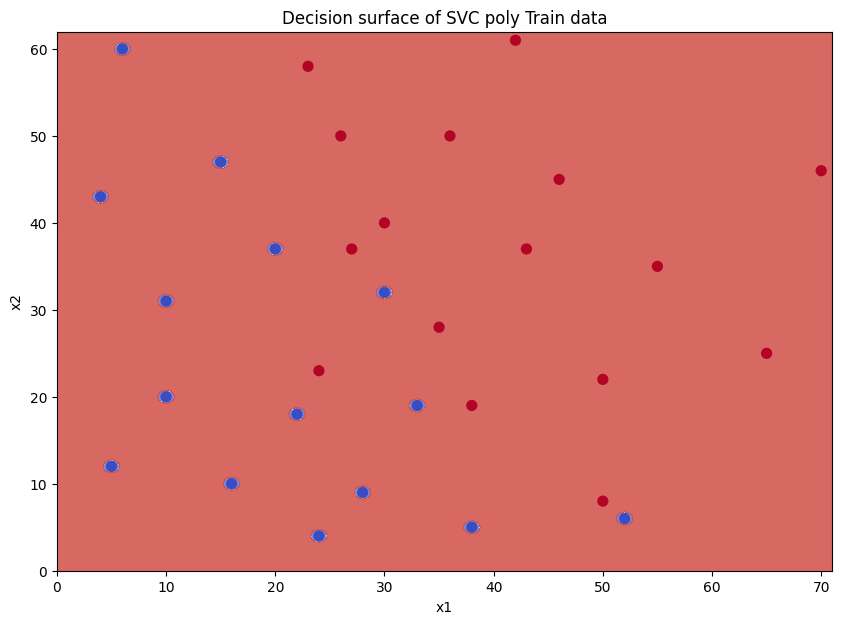

% of correct predictions for validation data
50.0


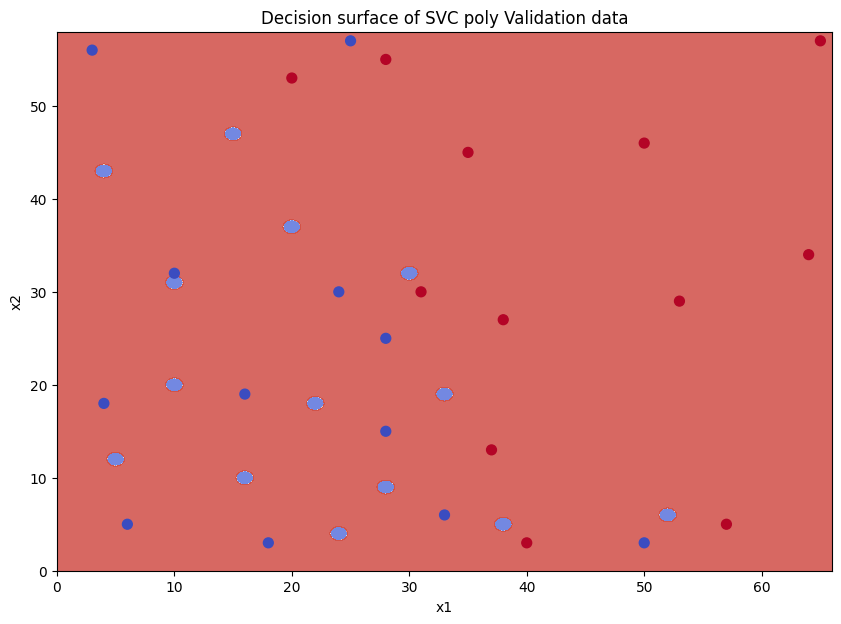

C = 1, gamma = 10
% of correct predictions on training data
100.0


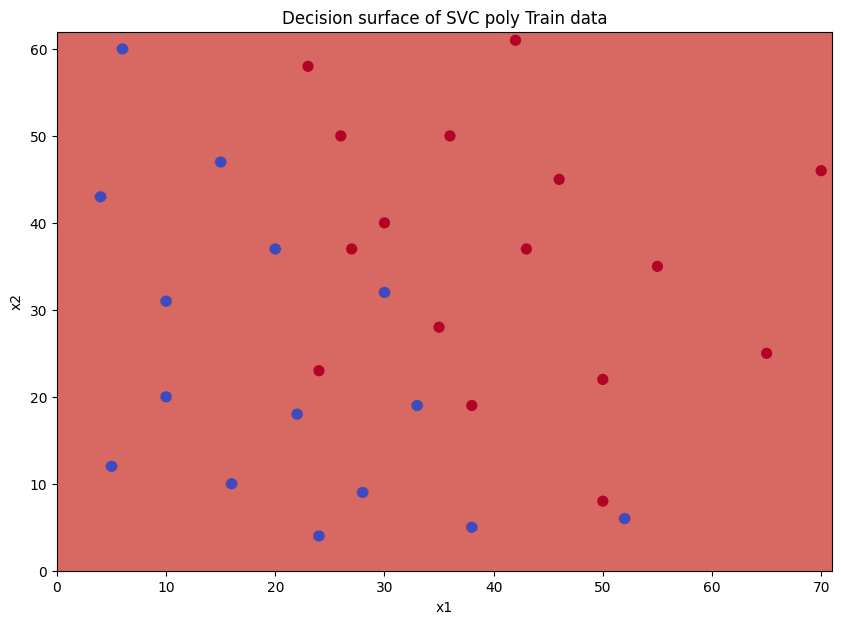

% of correct predictions for validation data
50.0


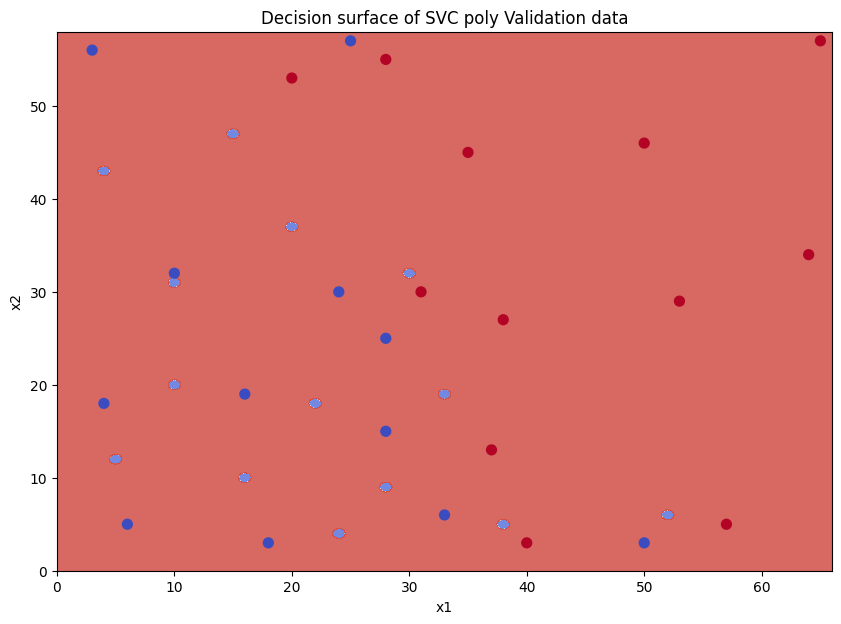

C = 10, gamma = 0.05
% of correct predictions on training data
100.0


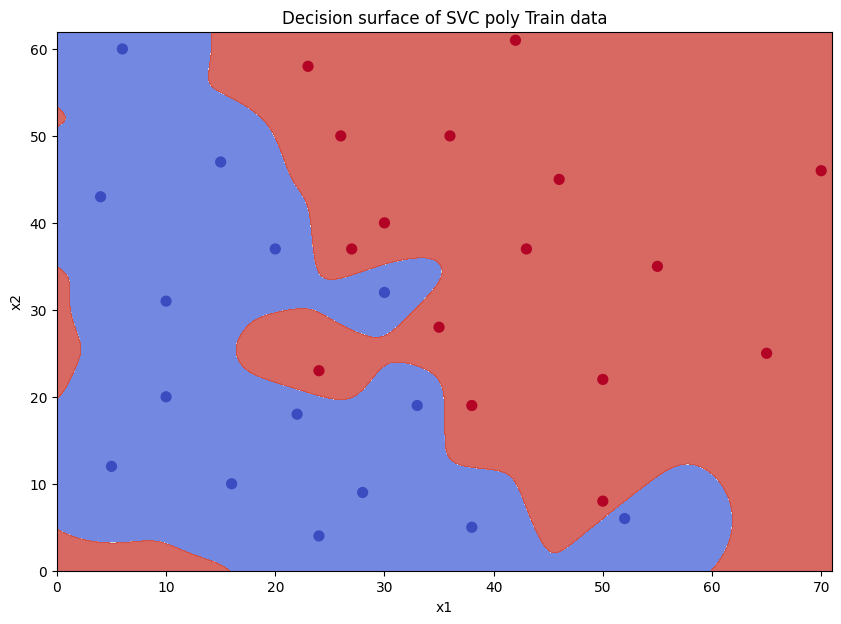

% of correct predictions for validation data
79.17


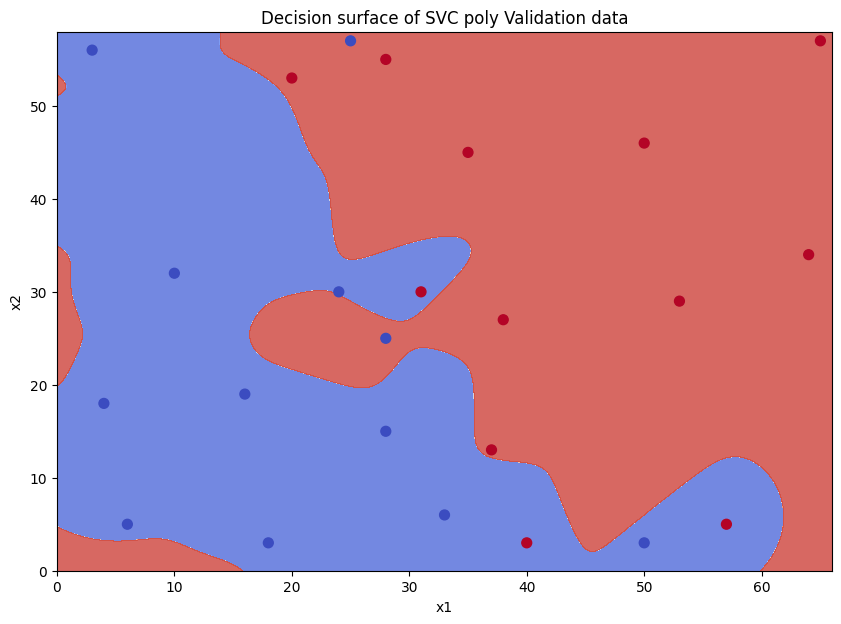

C = 10, gamma = 0.5
% of correct predictions on training data
100.0


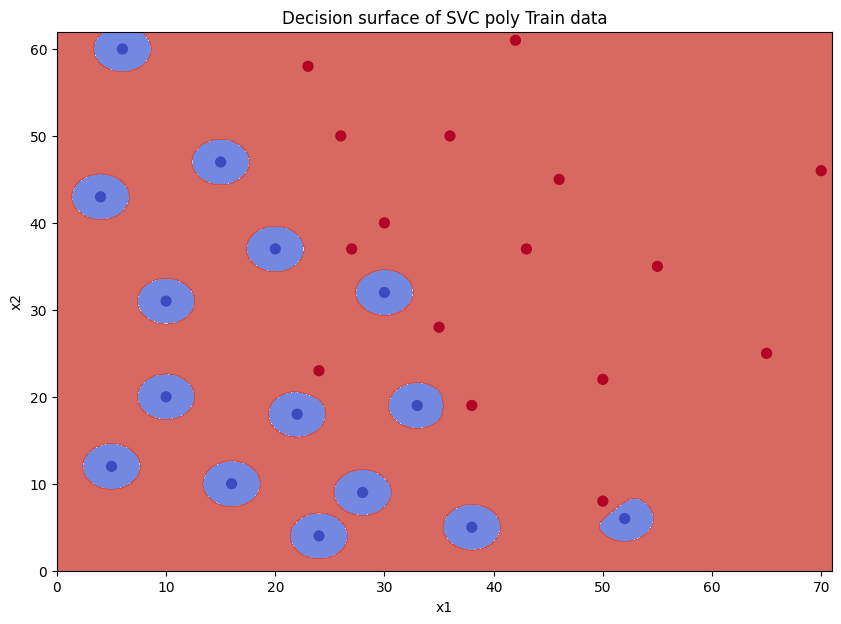

% of correct predictions for validation data
50.0


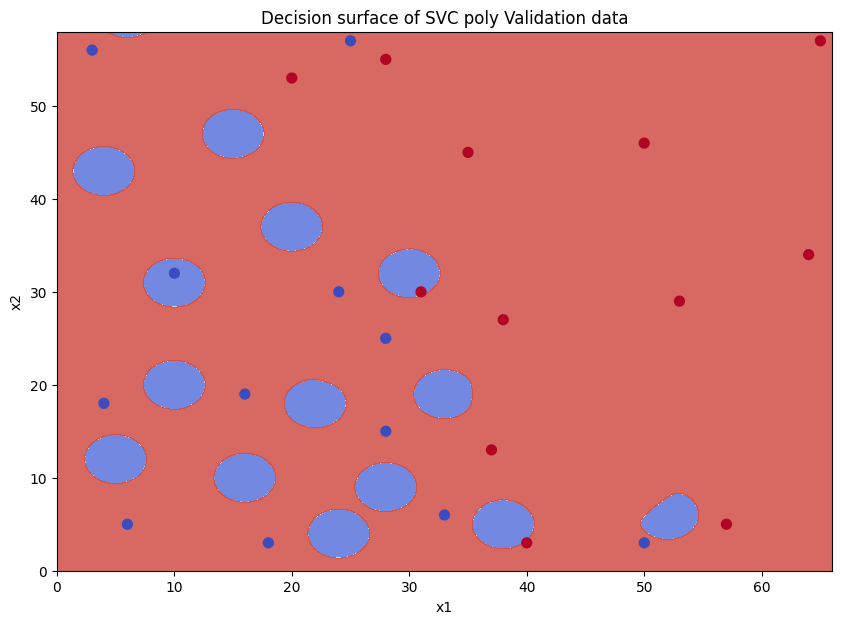

C = 10, gamma = 2
% of correct predictions on training data
100.0


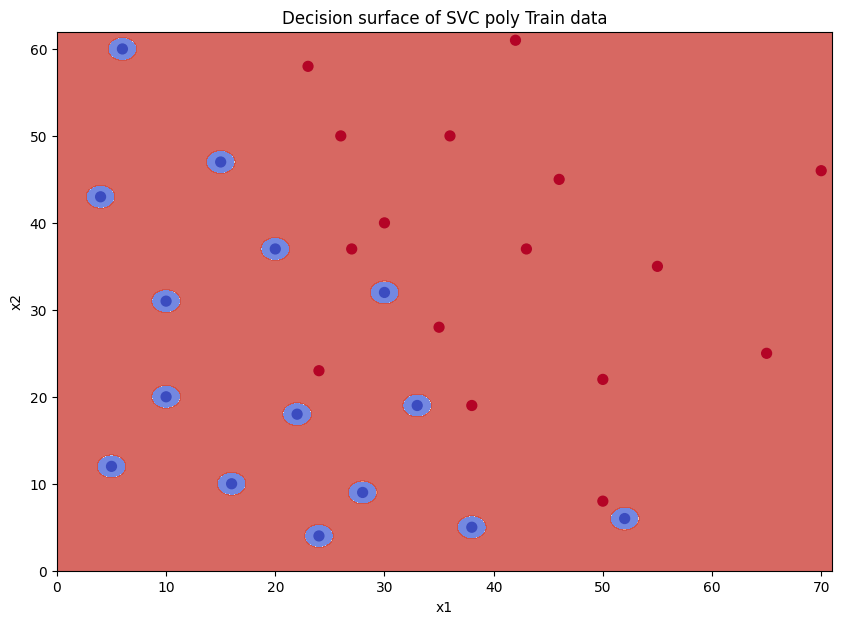

% of correct predictions for validation data
54.17


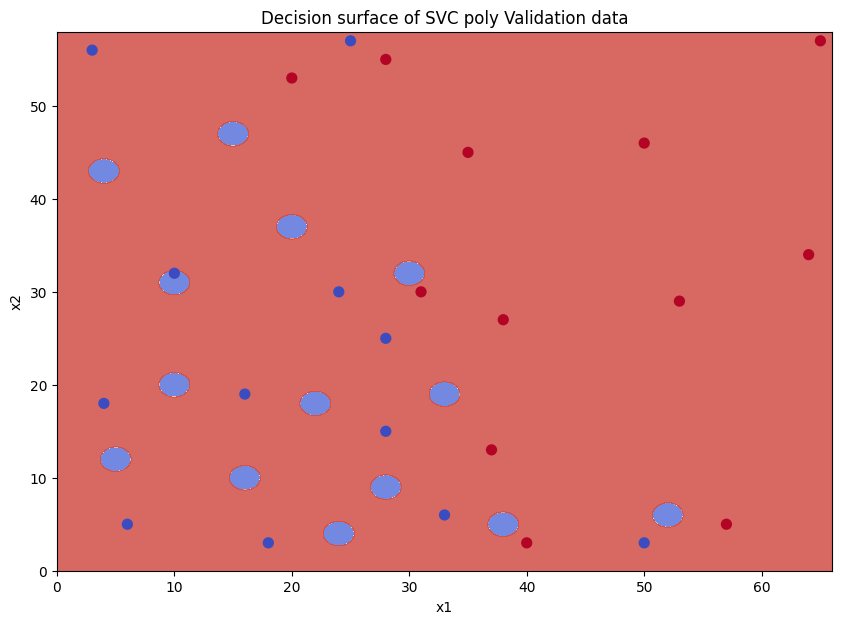

C = 10, gamma = 5
% of correct predictions on training data
100.0


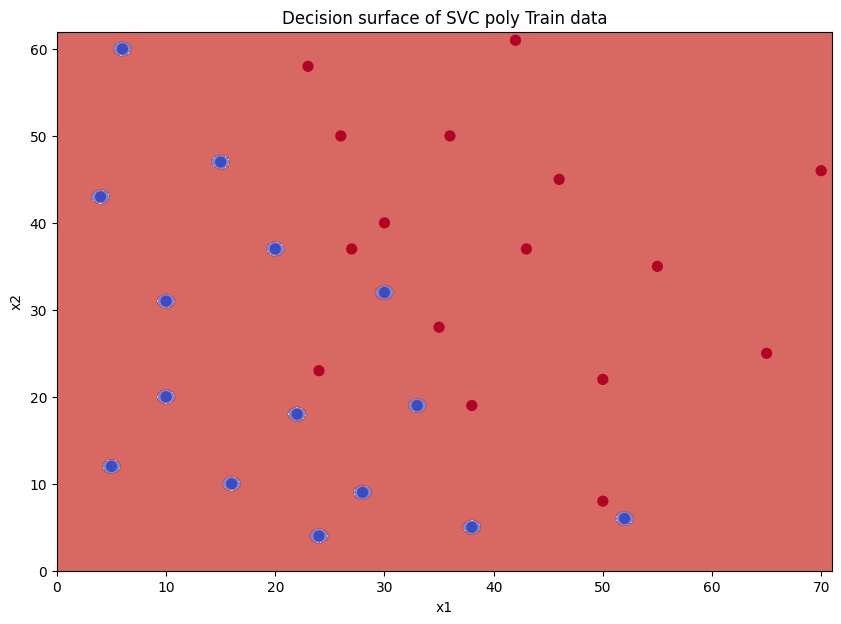

% of correct predictions for validation data
50.0


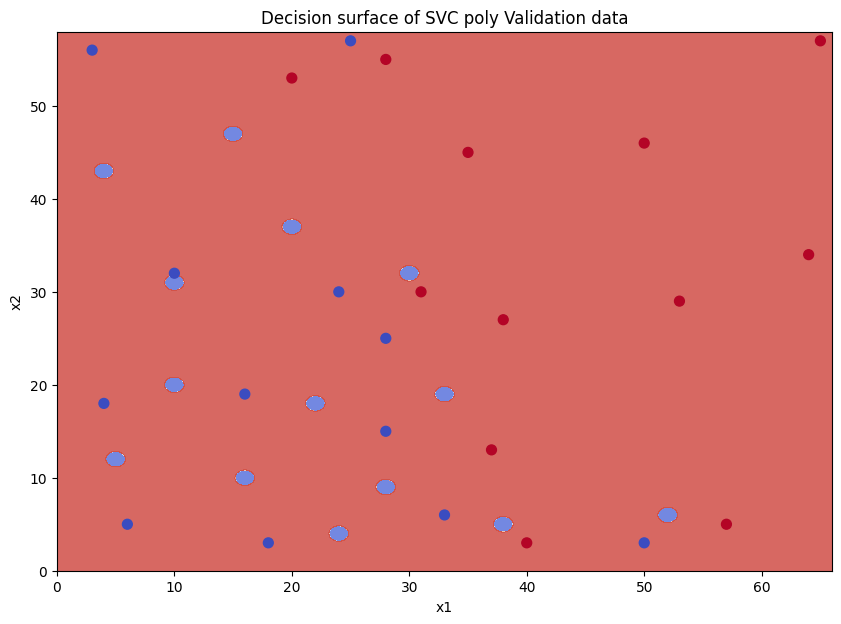

C = 10, gamma = 10
% of correct predictions on training data
100.0


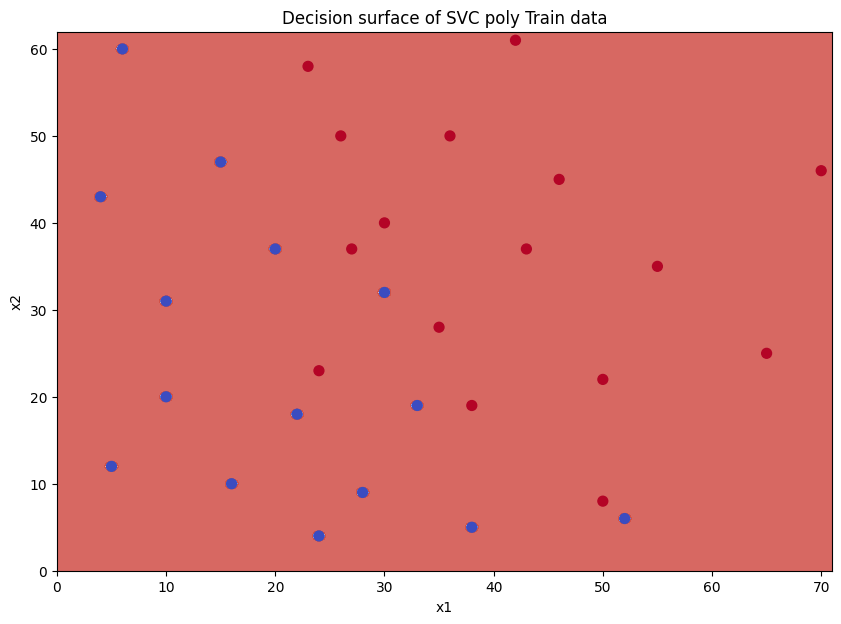

% of correct predictions for validation data
50.0


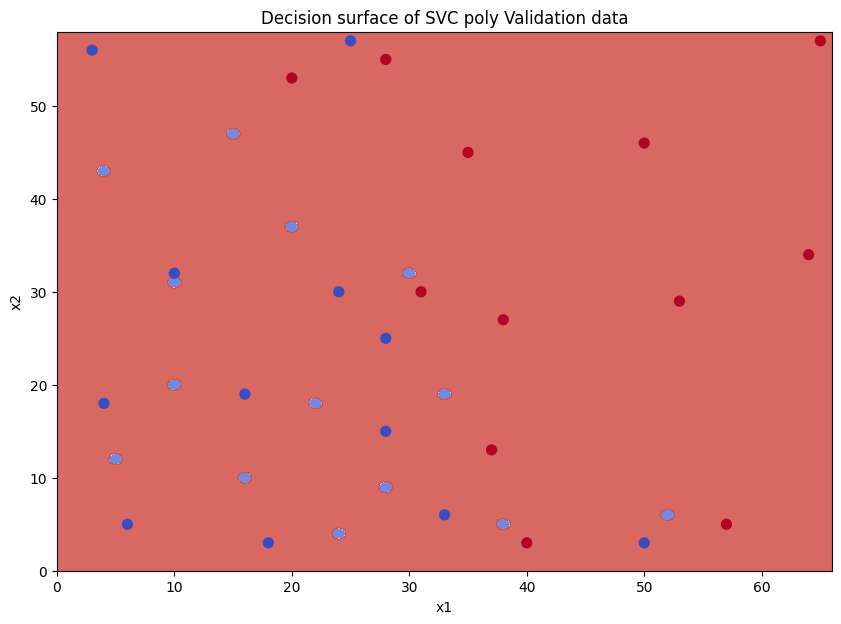

C = 1000, gamma = 0.05
% of correct predictions on training data
100.0


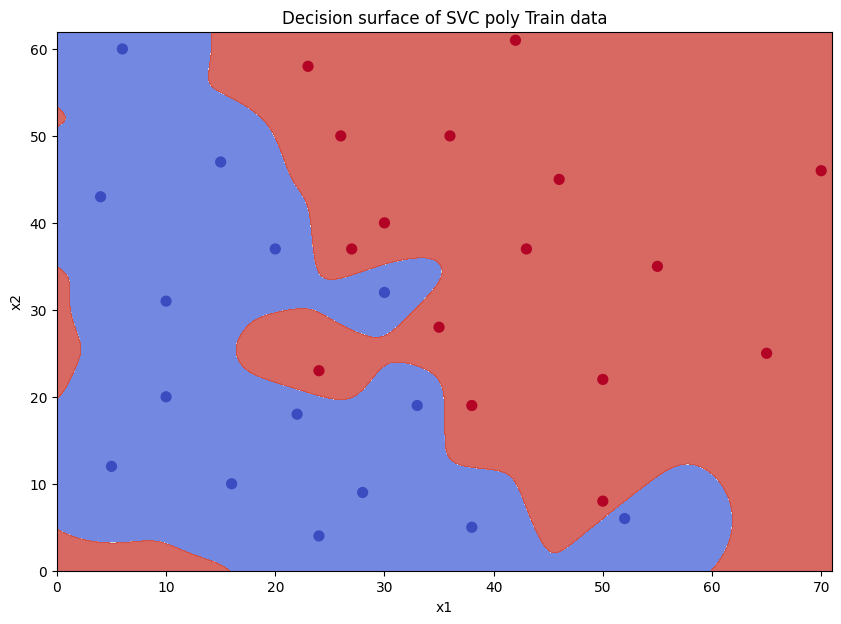

% of correct predictions for validation data
79.17


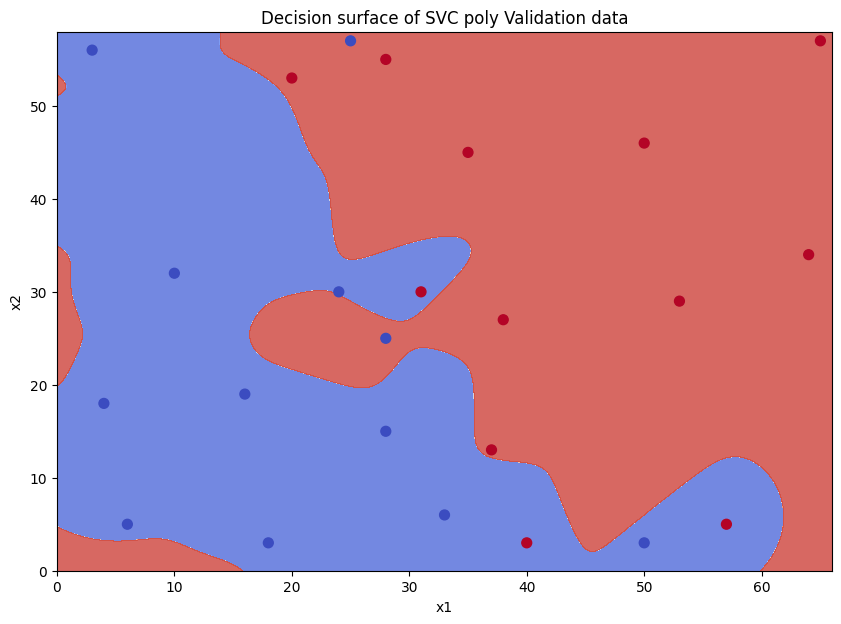

C = 1000, gamma = 0.5
% of correct predictions on training data
100.0


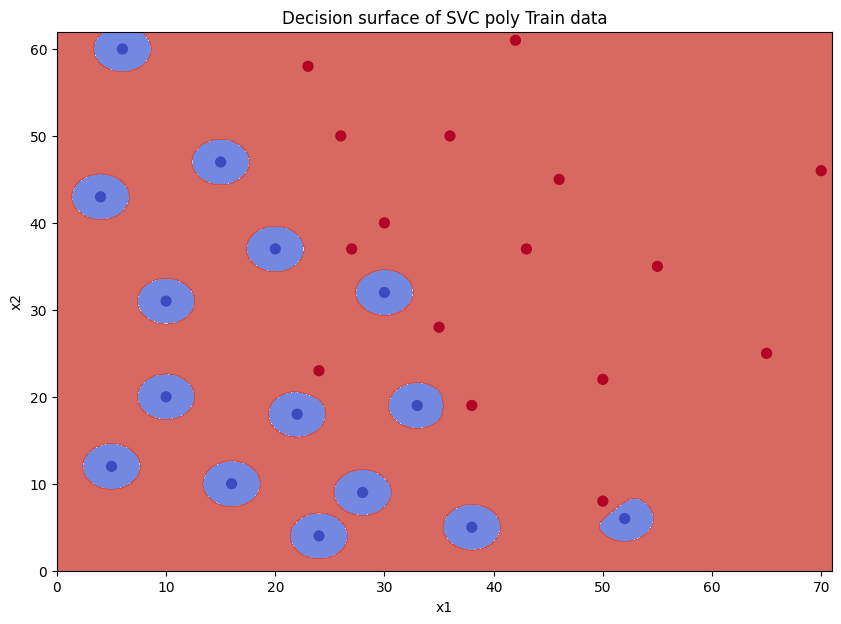

% of correct predictions for validation data
50.0


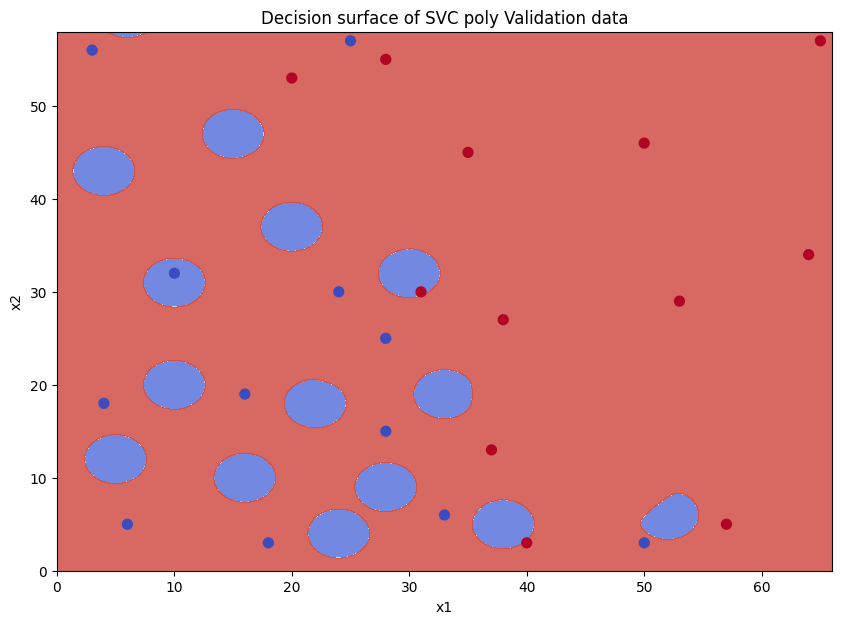

C = 1000, gamma = 2
% of correct predictions on training data
100.0


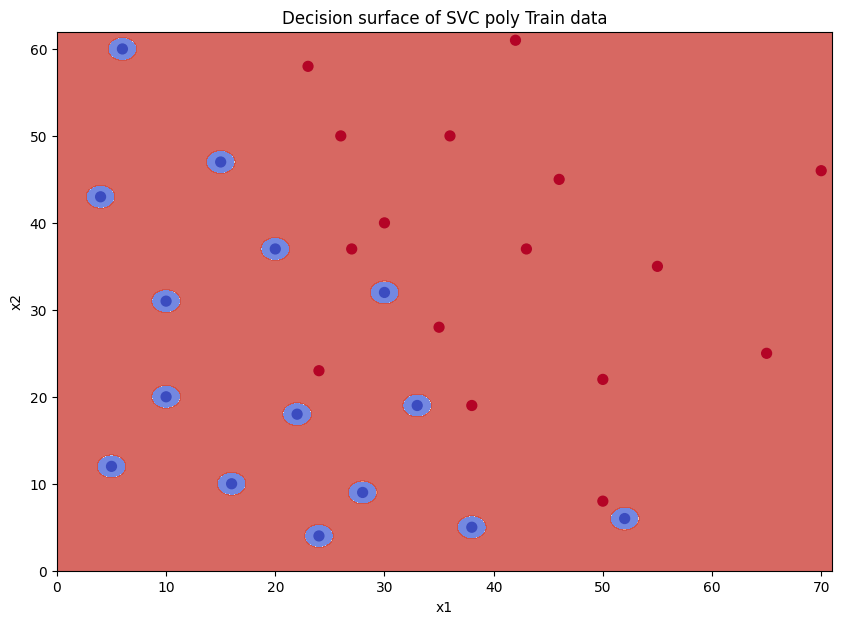

% of correct predictions for validation data
54.17


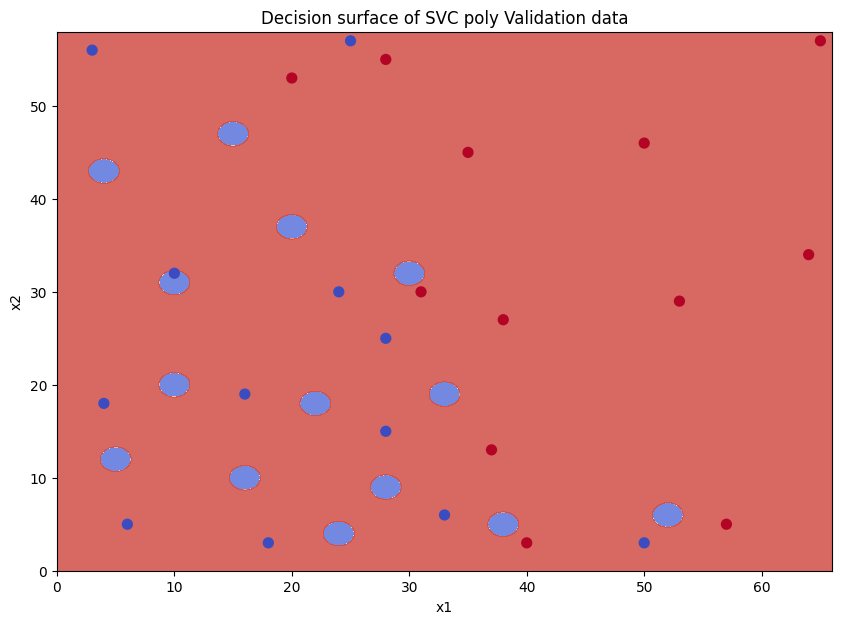

C = 1000, gamma = 5
% of correct predictions on training data
100.0


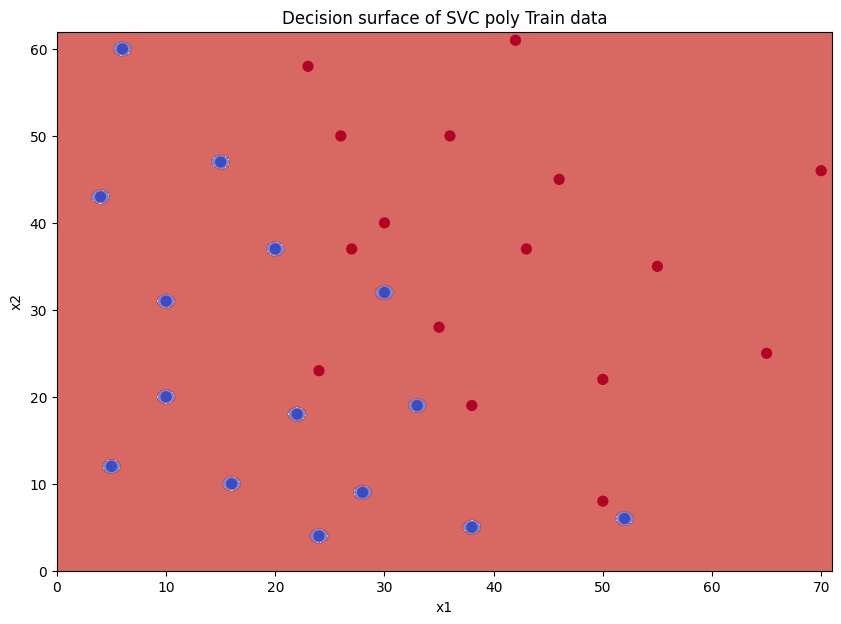

% of correct predictions for validation data
50.0


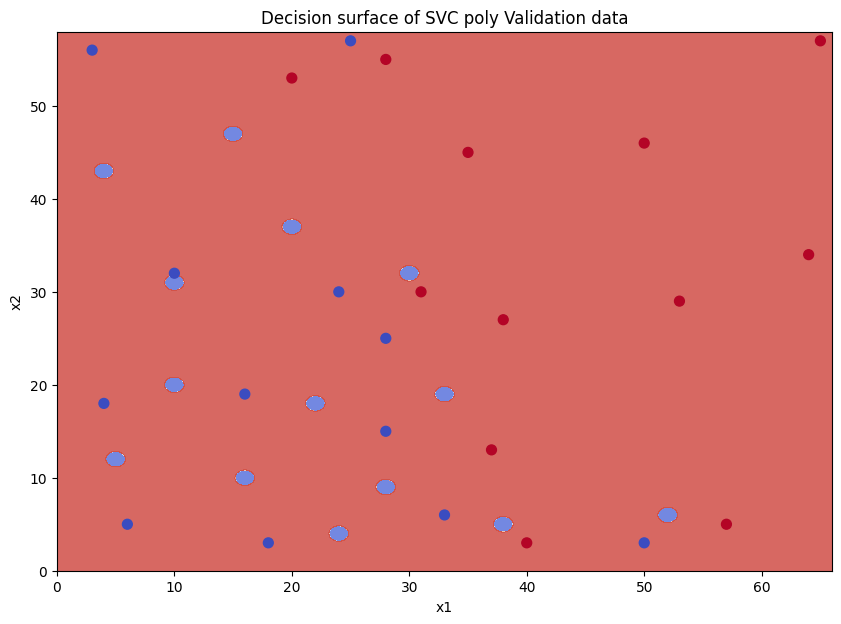

C = 1000, gamma = 10
% of correct predictions on training data
100.0


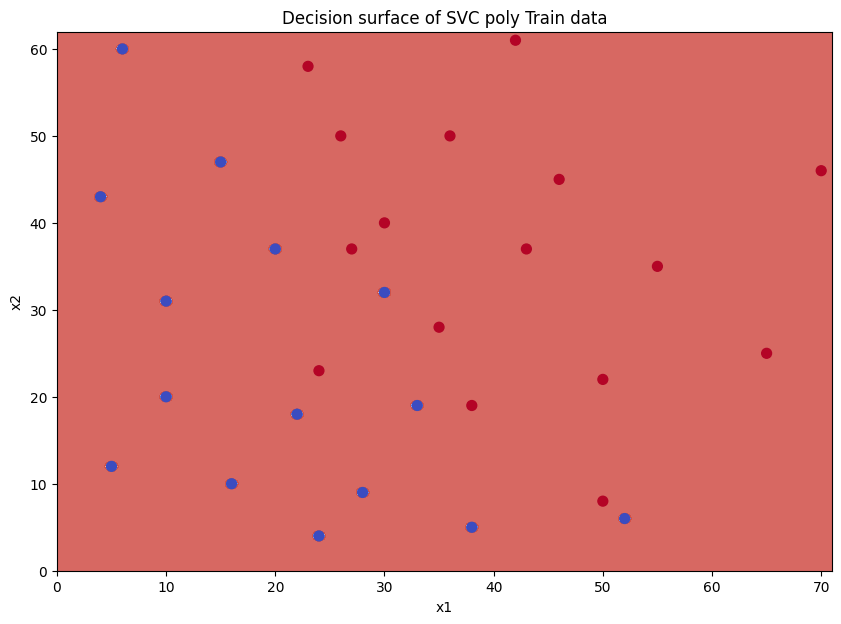

% of correct predictions for validation data
50.0


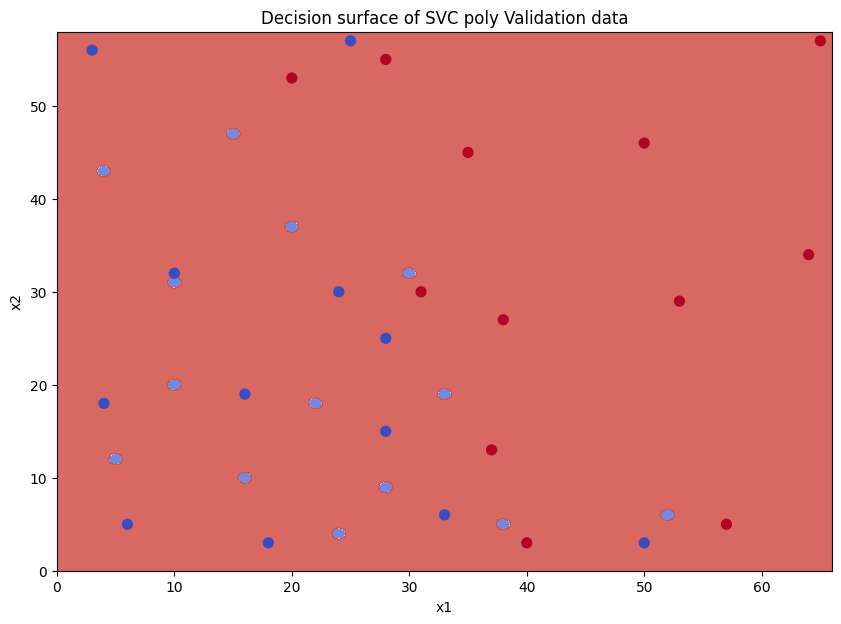

In [ ]:
# TO DO: Define a new model with a 'rbf' kernel and try different values of C and gamma together,
# and calculate the percentage of correct predictions for the training and validation data

gamma_value = [0.05, 0.5, 2, 5, 10 ]
C_value = [1e-5, 1e-2, 1, 10, 1000]

# Create rbf model
for C in C_value:
  for gamma in gamma_value:
    modelrbf2 = SVC(kernel = 'rbf', gamma = gamma, C = C)
    print(f"C = {C}, gamma = {gamma}")

    # Train the model using the data
    clfrbf2 = modelrbf2.fit(XTrain,yTrain)

    # TO DO: Check predictions for training data
    res = modelrbf2.predict(XTrain)
    print("% of correct predictions on training data")
    print(round(100/len(res)*(res==yTrain).sum(),2))
    plot_figure(XTrain, yTrain, clfrbf2, 'poly Train data')

    # TO DO: Check predictions for validation data
    res = modelrbf2.predict(XVal)
    print("% of correct predictions for validation data")
    print(round(100/len(res)*(res==yVal).sum(),2))
    plot_figure(XVal, yVal, clfrbf2, 'poly Validation data')